---
# Main Program
---

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as mpe
%matplotlib inline

import seaborn as sns
import numpy as np

from IPython.display import display,Image
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  

#import investpy

import yfinance as yf
from binance.client import Client
client = Client()

#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#------------ My Functions ------------#
from Functions.Visualization import Plots
from Functions.Preparation_Data import Preprocessing
from Functions.Extract_Data.Binance_API.Extract_Binance_Data import Binance
from Functions.Feature_Engineering.FE import Feature_Engineering
from Functions.Randomized_Grid_Search import RGS_M
#------------ My Functions ------------#

In [2]:
from matplotlib.animation import FuncAnimation
import matplotlib.patheffects as mpe
import mplcyberpunk as mplcp

from sklearn.model_selection import train_test_split

In [3]:
lr = LinearRegression()

# Define the model
dtr = DecisionTreeRegressor()

In [4]:
df = pd.read_csv('../Forecast_Prices/Data/Cryptocurrency/Crypto_Data.csv', index_col='Open time')
df

BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  BTCBUSD_Close  \
Open time                                                            
2020-01-01       7169.12       7231.86      7151.58        7176.58   
2020-01-02       7177.13       7185.03      6900.00        6945.33   
2020-01-03       6944.41       7393.50      6853.79        7329.20   
2020-01-04       7330.91       7388.00      7263.55        7346.20   
2020-01-05       7346.20       7486.66      7315.00        7351.42   
...                  ...           ...          ...            ...   
2023-01-01      16534.83      16619.00     16490.74       16610.68   
2023-01-02      16610.69      16793.83     16541.73       16667.55   
2023-01-03      16667.39      16774.13     16597.71       16669.47   
2023-01-04      16669.36      16986.86     16646.27       16845.70   
2023-01-05      16845.42      16872.96     16745.00       16861.60   

            BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  ETHBUSD_Low  \
Open time                                                              
2020-01-01     5.984141e+05        128.54        132.51       128.43   
2020-01-02     1.795818e+06        129.88        129.88       126.01   
2020-01-03     3.498114e+06        127.02        134.63       125.70   
2020-01-04     2.473634e+06        134.20        135.52       132.38   
2020-01-05     2.647992e+06        134.26        137.99       134.26   
...                     ...           ...           ...          ...   
2023-01-01     2.362445e+08       1195.67       1204.00      1190.22   
2023-01-02     3.497910e+08       1199.99       1224.00      1192.73   
2023-01-03     5.884571e+08       1213.61       1219.58      1204.32   
2023-01-04     5.620057e+08       1214.15       1272.35      1212.35   
2023-01-05     3.569742e+08       1256.34       1259.56      1242.40   

            ETHBUSD_Close  BNBUSDT_Open  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                                ...                               
2020-01-01         130.35       13.7159  ...       202.63         203.65   
2020-01-02         126.87       13.7072  ...       192.41         195.44   
2020-01-03         133.75       13.0104  ...       192.22         221.76   
2020-01-04         134.17       13.6481  ...       219.37         224.18   
2020-01-05         134.99       13.7978  ...       221.05         222.62   
...                   ...           ...  ...          ...            ...   
2023-01-01        1199.99      246.3000  ...        96.10          96.70   
2023-01-02        1213.61      244.5000  ...        95.40          99.30   
2023-01-03        1214.14      245.3000  ...        98.70          99.70   
2023-01-04        1256.34      246.2000  ...        99.50         101.50   
2023-01-05        1249.81      258.9000  ...       100.90         101.70   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   
2023-01-05       0.07380       0.07430      0.07240        0.07330   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604          1.620         1.591           1.593  
2020-01-02          1.594          1.597     

In [5]:
#df = Feature_Engineering.Log_Return(dataframe=df, name_of_column='BTCBUSD_Open')
#df

In [6]:
df = Preprocessing.Select_Target(dataframe=df, column_name='BTCBUSD_Close')

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()



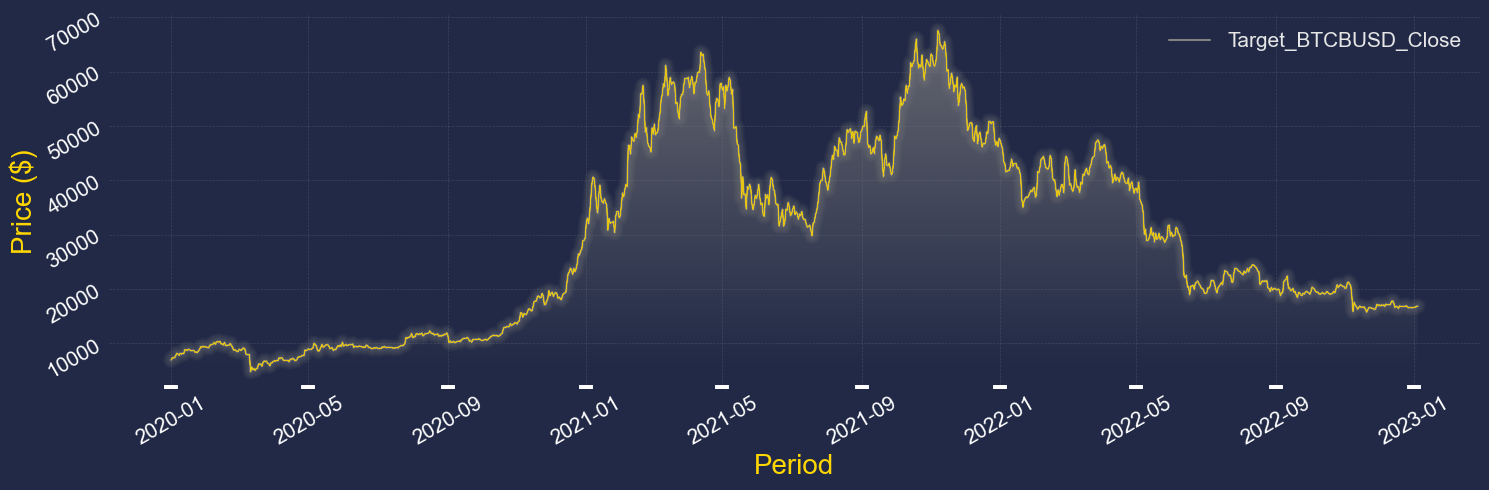

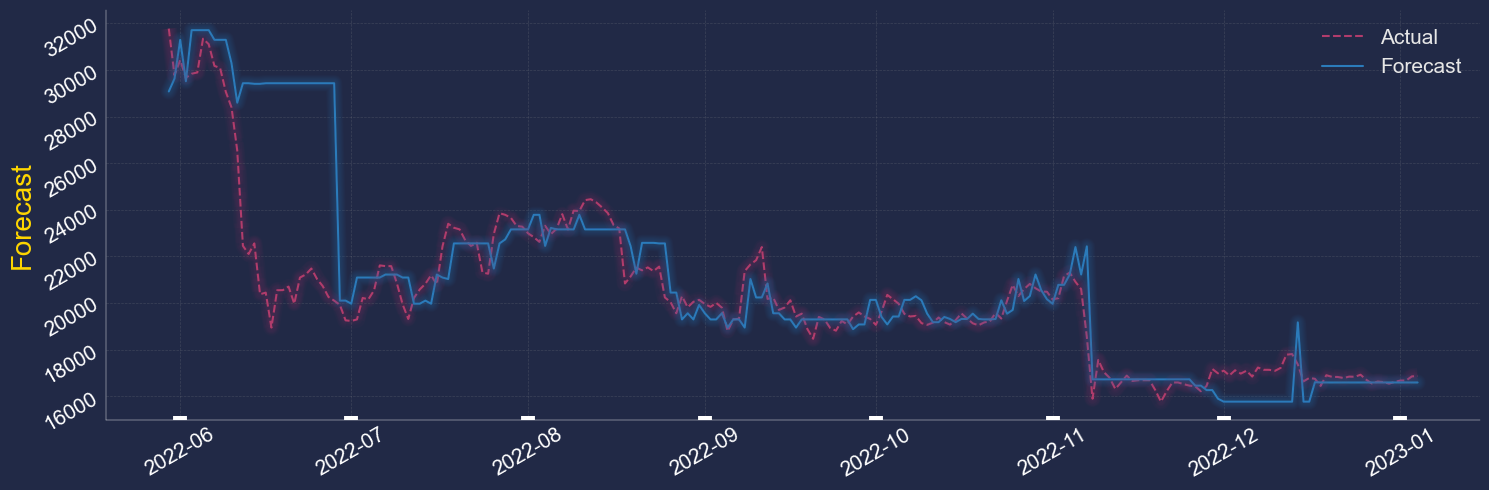

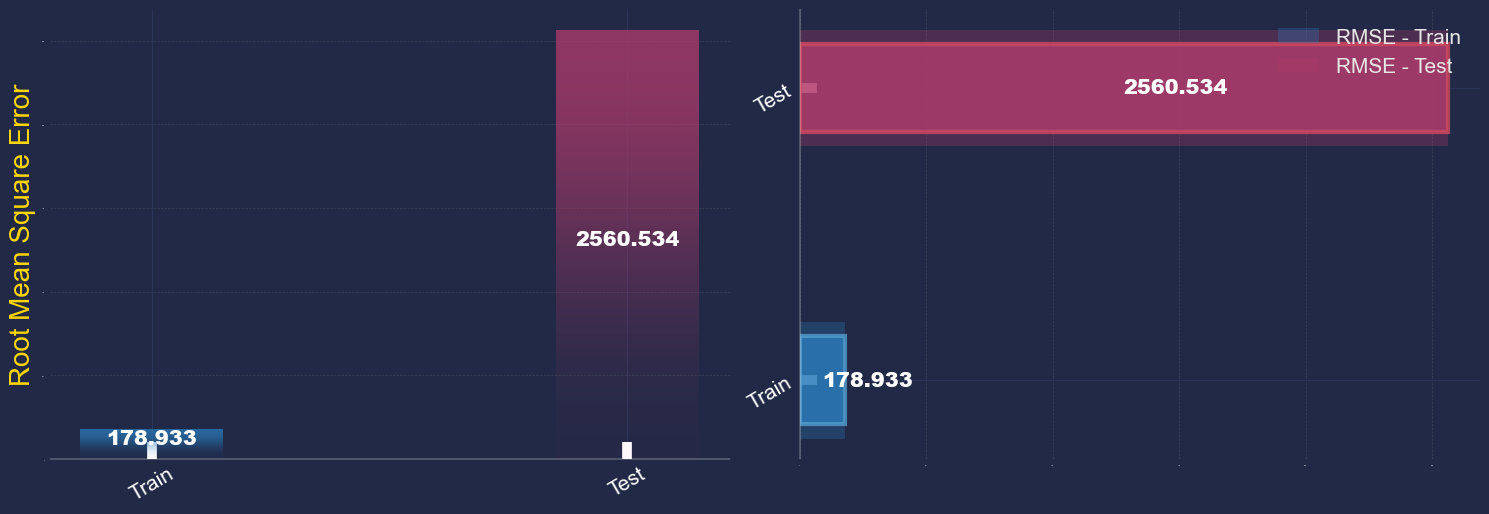

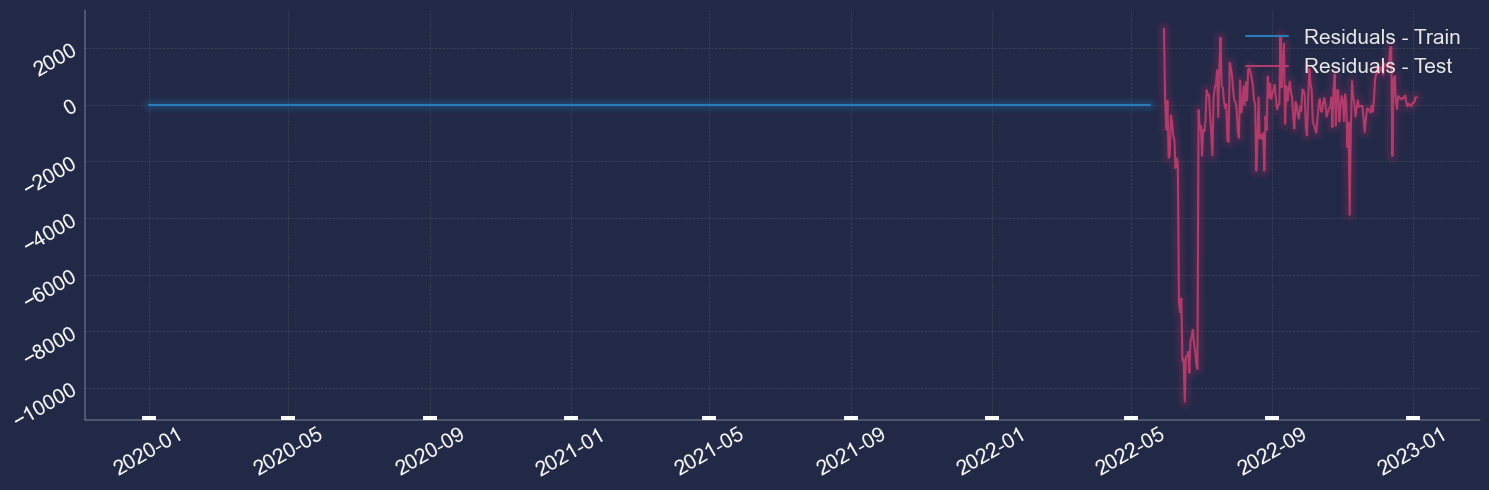

In [7]:
Plots.Plot_Of_Line(dataframe=df, column_name='Target_BTCBUSD_Close')
#Plots.Plot_Percentage(dataframe=df, column_name_1='BUSDUSDT_Volume', column_name_2='BTCBUSD_Open')
#Plots.Plot_Train_Test_Split(dataframe=df)
#Plots.Plot_Train_Test_Splits(dataframe=df)

Plots.Recursive_Forecast_Plot_Split(dataframe=df, model=dtr)

#Plots.Characteristics_of_LinearRegression(model=dtr)

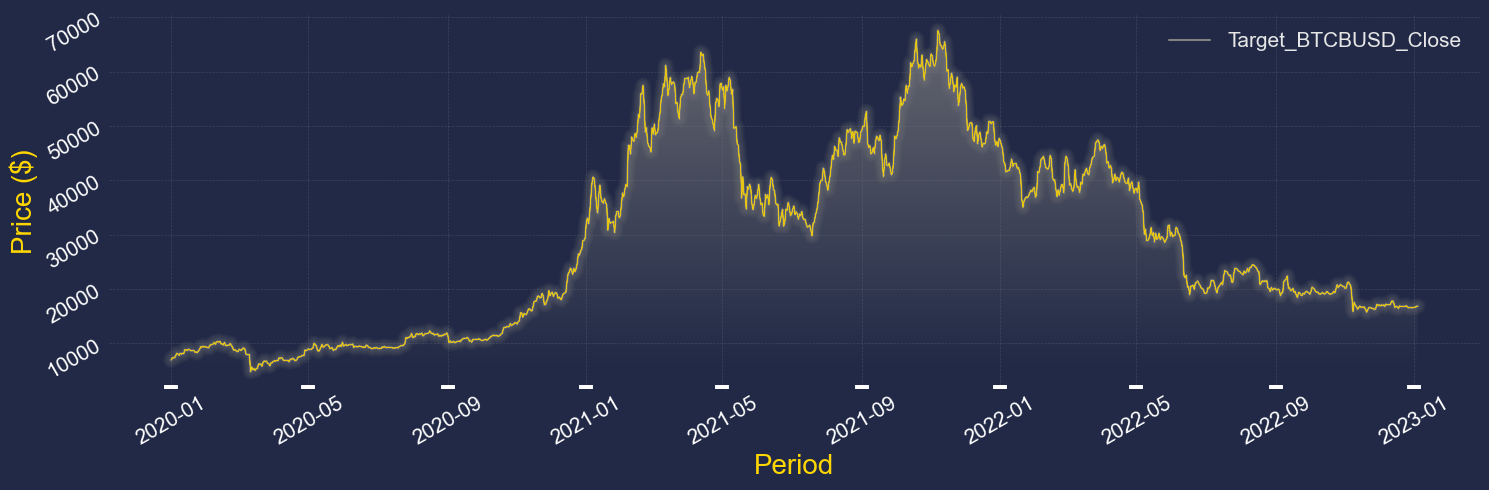

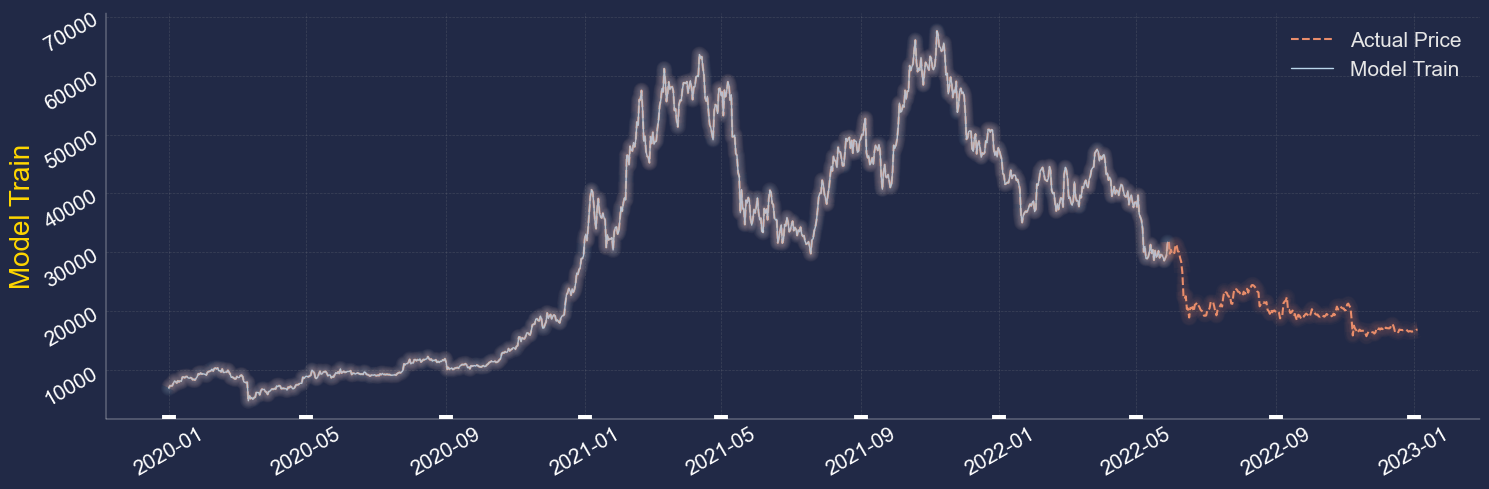

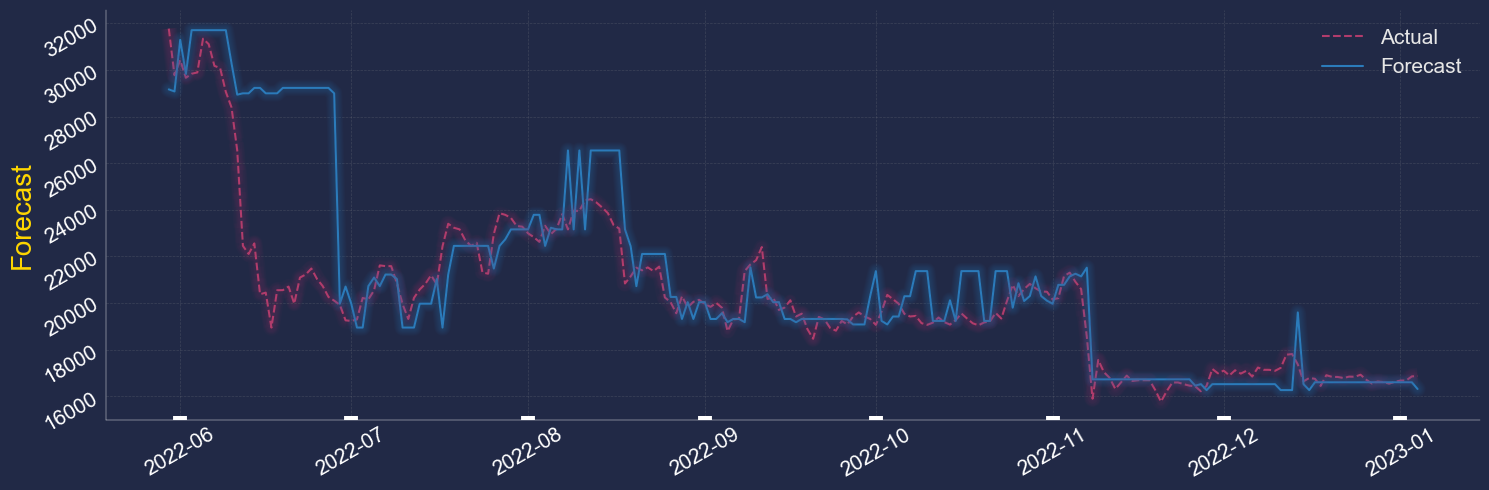

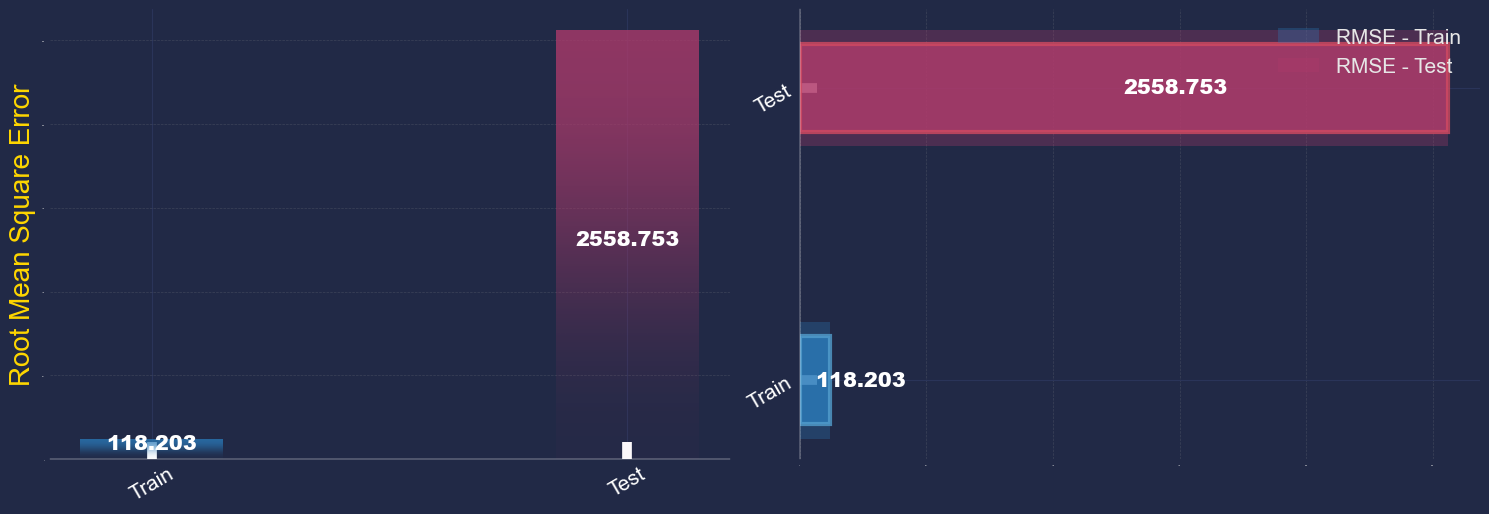

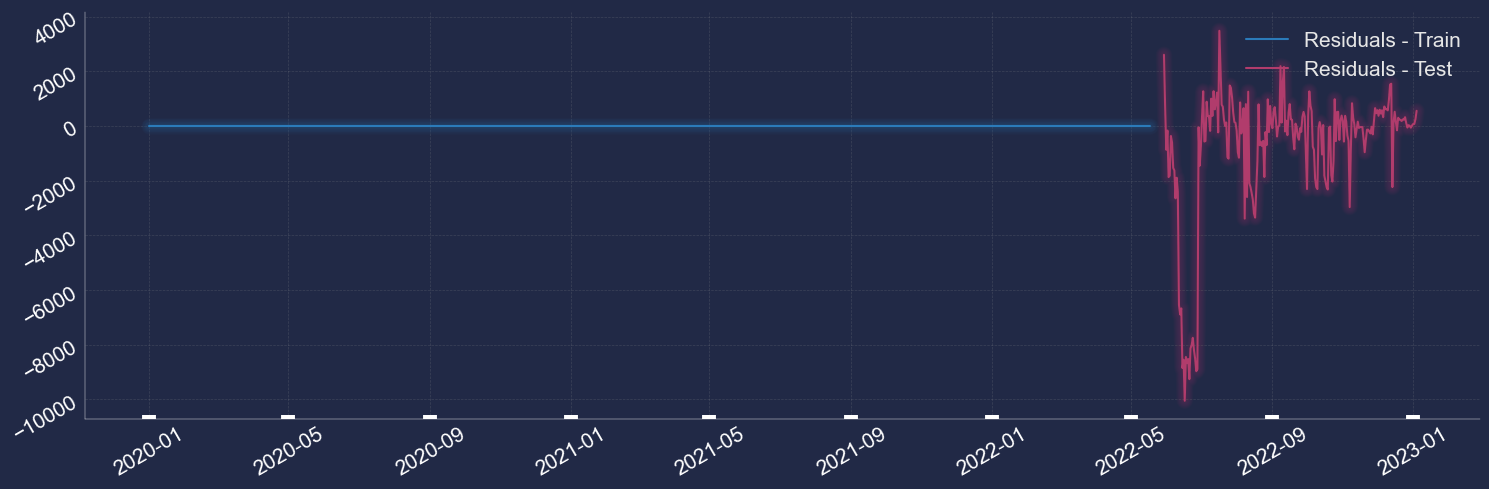

In [8]:
Plots.Plot_Of_Line(dataframe=df, column_name='Target_BTCBUSD_Close')
#Plots.Plot_Percentage(dataframe=df, column_name_1='BUSDUSDT_Volume', column_name_2='BTCBUSD_Open')
#Plots.Plot_Train_Test_Split(dataframe=df)
#Plots.Plot_Train_Test_Splits(dataframe=df)

Plots.Recursive_Forecast_Train_Test_Plot_Split(dataframe=df, model=dtr)

#Plots.Characteristics_of_LinearRegression(model=lr)

-------------------------
Full Length is:  1100
Length of Train is:  1045
Length of Test is:  55
-------------------------



!!!------------... Start Randomized Search CV ...------------!!!
The Random Hyparameters Tuning is:  DecisionTreeRegressor(criterion='absolute_error', min_impurity_decrease=0.1,
                      min_samples_leaf=2)
------------------------------------------------------------------
Train-Set Root Mean Square Error:  503.405
Test-Set Root Mean Square Error:  690.4
------------------------------------------------------------------


The Random Hyparameters Tuning is:  DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=20,
                      min_impurity_decrease=0.01, min_samples_leaf=5)
------------------------------------------------------------------
Train-Set Root Mean Square Error:  506.842
Test-Set Root Mean Square Error:  774.098
---------------------------------------------------

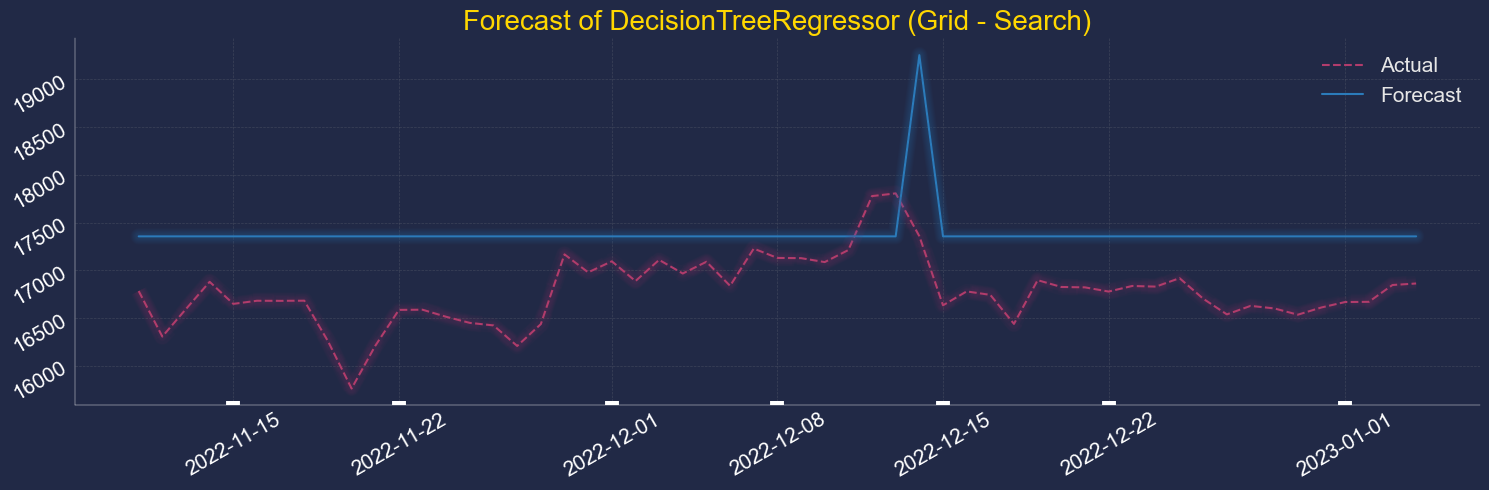

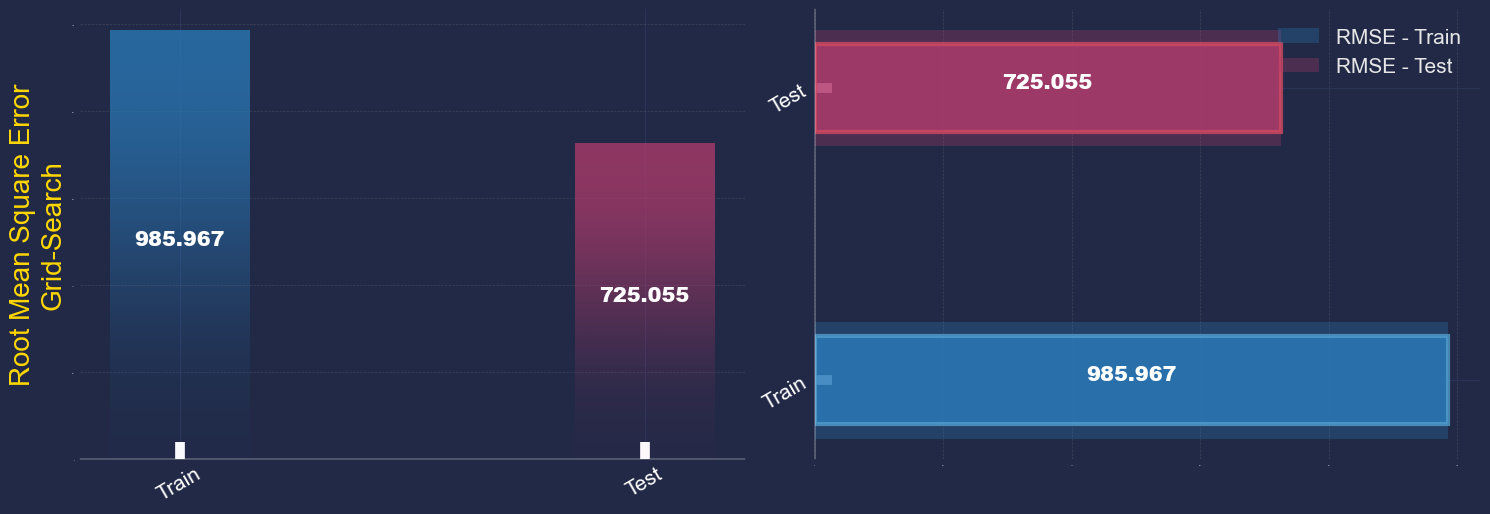

In [9]:
RGS_M.DecisionTreeRegressorModel(dataframe=df)

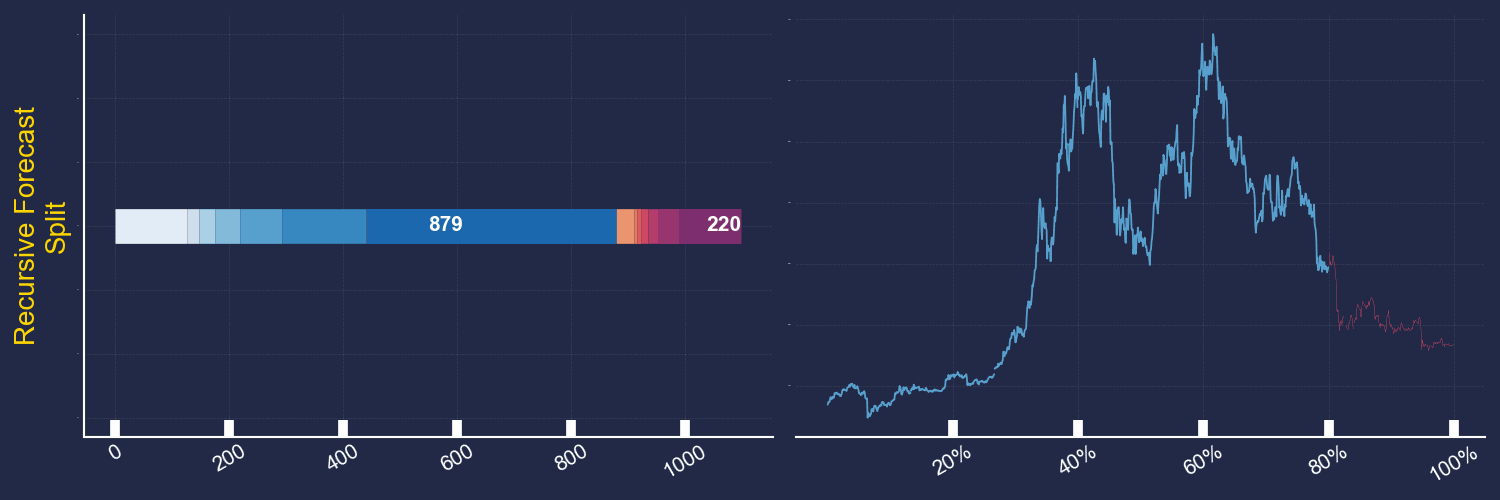

In [8]:
Image('../Forecast_Prices/Animation/plot_bars_lines.gif')

In [10]:
#Plots.Plot_Train_Test_Splits(dataframe=df)

In [12]:
#Plots.Characteristics_of_Model(model=lr)

In [12]:
lr.feature_names_in_[lr.coef_ >= 1038.4696621945163]

array(['ADABUSD_Low', 'ADABUSD_Close', 'XRPBUSD_Open', 'XRPBUSD_Close',
       'VETBUSD_Open', 'TRXBUSD_Open', 'TRXBUSD_Low', 'XLMBUSD_High'],
      dtype=object)

In [13]:
lr.feature_names_in_[lr.coef_ <= -1067.1638944579051]

array(['ADABUSD_Open', 'ADABUSD_High', 'XRPBUSD_Low', 'VETBUSD_High',
       'VETBUSD_Low', 'VETBUSD_Close', 'TRXBUSD_High', 'TRXBUSD_Close',
       'XLMBUSD_Low', 'XLMBUSD_Close'], dtype=object)

# Binance

In [24]:
df = pd.read_csv("../Forecast_Prices/Data/Binance_Data_Crypto/Binance_Crypto_Data.csv", index_col="Open time")
df
#Plots.Plot_Of_Missing_Data(dataframe=df)
#Plots.Plot_Of_Missing_Data(dataframe=df[df.index >= '2020-08-01'])
#df = Preprocessing.Drop_Big_NullSum_Columns(dataframe=df)
#df = Preprocessing.Keep_Specific_Columns(dataframe=df)

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-04     0.018298     0.018360    0.018140      0.018248     0.005747   
2020-01-05     0.018247     0.018565    0.018152      0.018400     0.005817   
...                 ...          ...         ...           ...          ...   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   
2023-12-30     0.054650     0.054850    0.054130      0.054380     0.001742   
2023-12-31     0.054370     0.054470    0.053550      0.053970     0.001738   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-04     0.005828    0.005713      0.005818     0.001859     0.001887   
2020-01-05     0.005970    0.005740      0.005884     0.001876     0.001917   
...                 ...         ...           ...          ...          ...   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   
2023-12-30     0.001765    0.001720      0.001737     0.007459     0.007627   
2023-12-31     0.001745    0.001696      0.001723     0.007524     0.007706   

            ...  RENDERTRY_Low  RENDERTRY_Close  RENDEREUR_Open  \
Open time   ...                                                   
2020-01-01  ...            NaN              NaN             NaN   
2020-01-02  ...            NaN              NaN             NaN   
2020-01-03  ...            NaN              NaN             NaN   
2020-01-04  ...            NaN              NaN             NaN   
2020-01-05  ...            NaN              NaN             NaN   
...         ...            ...              ...             ...   
2023-12-27  ...            NaN              NaN             NaN   
2023-12-28  ...            NaN              NaN             NaN   
2023-12-29  ...            NaN              NaN             NaN   
2023-12-30  ...            NaN              NaN             NaN   
2023-12-31  ...            NaN              NaN             NaN   

            RENDEREUR_High  RENDEREUR_Low  RENDEREUR_Close  RENDERBRL_Open  \
Open time                                                                    
2020-01-01             NaN            NaN              NaN             NaN   
2020-01-02             NaN            NaN              NaN             NaN   
2020-01-03             NaN            NaN              NaN             NaN   
2020-01-04             NaN            NaN              NaN             NaN   
2020-01-05             NaN            NaN              NaN             NaN   
...                    ...            ...              ...             ...   
2023-12-27             NaN            NaN              NaN             NaN   
2023-12-28             NaN            NaN              NaN             NaN   
2023-12-29             NaN            NaN              NaN             NaN   
2023-12-30             NaN            NaN              NaN             NaN   
2023-12-31             NaN            NaN              NaN             NaN   

            RENDERBRL_High  RENDERBRL_Low  RENDERBRL_Close  
Open tim

In [25]:
#Plots.Plot_Of_Missing_Data(dataframe=df)

In [26]:
#df.to_csv('./Data/Binance_Data_Crypto/Binance_Filter_Crypto_Data.csv', index=True)
df = Preprocessing.Drop_Big_NullSum_Columns(dataframe=df)
df

--- Start Drop_Big_NullSum_Columns()
.
 Drop > 12% null columns length of dataframe
.
--- End  Drop_Big_NullSum_Columns()



ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-04     0.018298     0.018360    0.018140      0.018248     0.005747   
2020-01-05     0.018247     0.018565    0.018152      0.018400     0.005817   
...                 ...          ...         ...           ...          ...   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   
2023-12-30     0.054650     0.054850    0.054130      0.054380     0.001742   
2023-12-31     0.054370     0.054470    0.053550      0.053970     0.001738   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-04     0.005828    0.005713      0.005818     0.001859     0.001887   
2020-01-05     0.005970    0.005740      0.005884     0.001876     0.001917   
...                 ...         ...           ...          ...          ...   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   
2023-12-30     0.001765    0.001720      0.001737     0.007459     0.007627   
2023-12-31     0.001745    0.001696      0.001723     0.007524     0.007706   

            ...    DGBBTC_Low  DGBBTC_Close  BTCUAH_Open  BTCUAH_High  \
Open time   ...                                                         
2020-01-01  ...           NaN           NaN          NaN          NaN   
2020-01-02  ...           NaN           NaN          NaN          NaN   
2020-01-03  ...           NaN           NaN          NaN          NaN   
2020-01-04  ...           NaN           NaN          NaN          NaN   
2020-01-05  ...           NaN           NaN          NaN          NaN   
...         ...           ...           ...          ...          ...   
2023-12-27  ...  2.200000e-07  2.300000e-07    1812684.0    1850000.0   
2023-12-28  ...  2.200000e-07  2.200000e-07    1840822.0    1845536.0   
2023-12-29  ...  2.200000e-07  2.200000e-07    1815596.0    1830500.0   
2023-12-30  ...  2.200000e-07  2.300000e-07    1788114.0    1814785.0   
2023-12-31  ...  2.200000e-07  2.200000e-07    1803567.0    1822085.0   

            BTCUAH_Low  BTCUAH_Close  USDTUAH_Open  USDTUAH_High  USDTUAH_Low  \
Open time                                                                       
2020-01-01         NaN           NaN           NaN           NaN          NaN   
2020-01-02         NaN           NaN           NaN           NaN          NaN   
2020-01-03         NaN           NaN           NaN           NaN          NaN   
2020-01-04         NaN           NaN           NaN           NaN          NaN   
2020-01-05         NaN           NaN           NaN           NaN          NaN   
...                ...           ...           ...           ...          ...   
2023-12-27   1794336.0     1836121.0         42.61         42.63        42.25   
2023-12-28   1788041.0     1814672.0         42.27         42.57        42.19   
2023-12-29   1770672.0     1791343.0         42.53         42.84        42.28   
2023-12-30   1758275.0     1806452.0         42.59         43.04        42.35   
2023-12-31   1782581.0     1784309

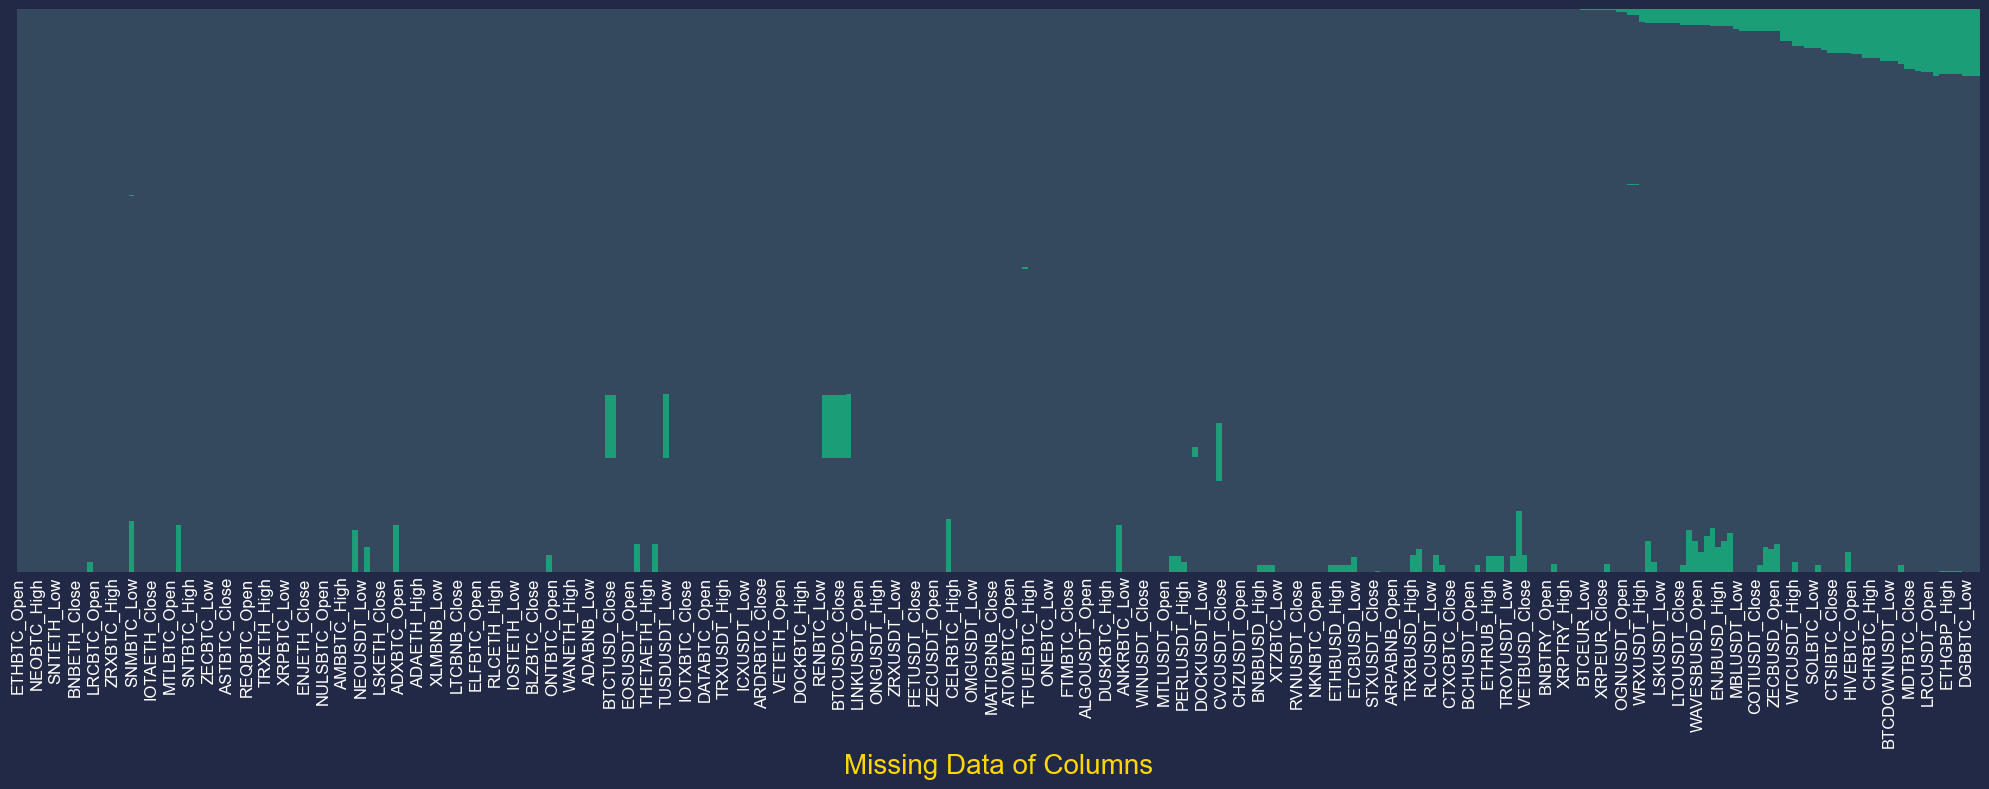

In [27]:
Plots.Plot_Of_Missing_Data(dataframe=df)

In [28]:
#df.to_csv('../Forecast_Prices//Data/Binance_Data_Crypto/Binance_Filter_Crypto_Data.csv')

In [3]:
lr = LinearRegression()

In [4]:
df = pd.read_csv("../Forecast_Prices/Data/Binance_Data_Crypto/Binance_Filter_Crypto_Data.csv", index_col="Open time")
df

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-04     0.018298     0.018360    0.018140      0.018248     0.005747   
2020-01-05     0.018247     0.018565    0.018152      0.018400     0.005817   
...                 ...          ...         ...           ...          ...   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   
2023-12-30     0.054650     0.054850    0.054130      0.054380     0.001742   
2023-12-31     0.054370     0.054470    0.053550      0.053970     0.001738   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-04     0.005828    0.005713      0.005818     0.001859     0.001887   
2020-01-05     0.005970    0.005740      0.005884     0.001876     0.001917   
...                 ...         ...           ...          ...          ...   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   
2023-12-30     0.001765    0.001720      0.001737     0.007459     0.007627   
2023-12-31     0.001745    0.001696      0.001723     0.007524     0.007706   

            ...    DGBBTC_Low  DGBBTC_Close  BTCUAH_Open  BTCUAH_High  \
Open time   ...                                                         
2020-01-01  ...           NaN           NaN          NaN          NaN   
2020-01-02  ...           NaN           NaN          NaN          NaN   
2020-01-03  ...           NaN           NaN          NaN          NaN   
2020-01-04  ...           NaN           NaN          NaN          NaN   
2020-01-05  ...           NaN           NaN          NaN          NaN   
...         ...           ...           ...          ...          ...   
2023-12-27  ...  2.200000e-07  2.300000e-07    1812684.0    1850000.0   
2023-12-28  ...  2.200000e-07  2.200000e-07    1840822.0    1845536.0   
2023-12-29  ...  2.200000e-07  2.200000e-07    1815596.0    1830500.0   
2023-12-30  ...  2.200000e-07  2.300000e-07    1788114.0    1814785.0   
2023-12-31  ...  2.200000e-07  2.200000e-07    1803567.0    1822085.0   

            BTCUAH_Low  BTCUAH_Close  USDTUAH_Open  USDTUAH_High  USDTUAH_Low  \
Open time                                                                       
2020-01-01         NaN           NaN           NaN           NaN          NaN   
2020-01-02         NaN           NaN           NaN           NaN          NaN   
2020-01-03         NaN           NaN           NaN           NaN          NaN   
2020-01-04         NaN           NaN           NaN           NaN          NaN   
2020-01-05         NaN           NaN           NaN           NaN          NaN   
...                ...           ...           ...           ...          ...   
2023-12-27   1794336.0     1836121.0         42.61         42.63        42.25   
2023-12-28   1788041.0     1814672.0         42.27         42.57        42.19   
2023-12-29   1770672.0     1791343.0         42.53         42.84        42.28   
2023-12-30   1758275.0     1806452.0         42.59         43.04        42.35   
2023-12-31   1782581.0     1784309

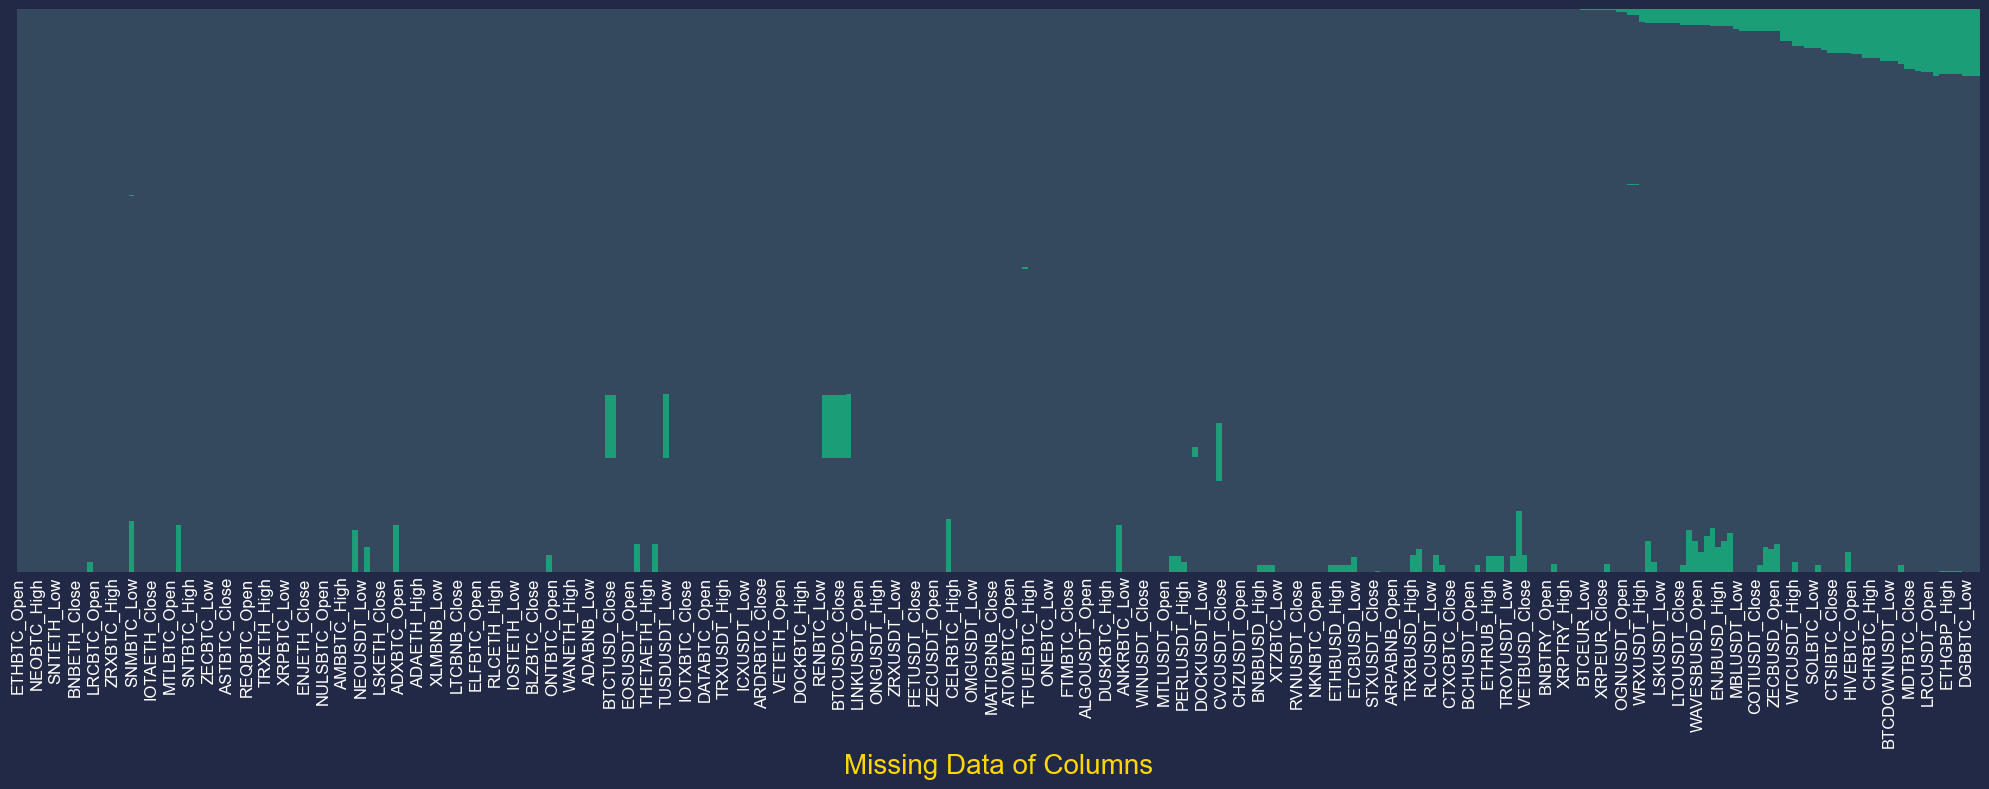

In [5]:
Plots.Plot_Of_Missing_Data(dataframe=df)

---

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  283
--- End Correlation()


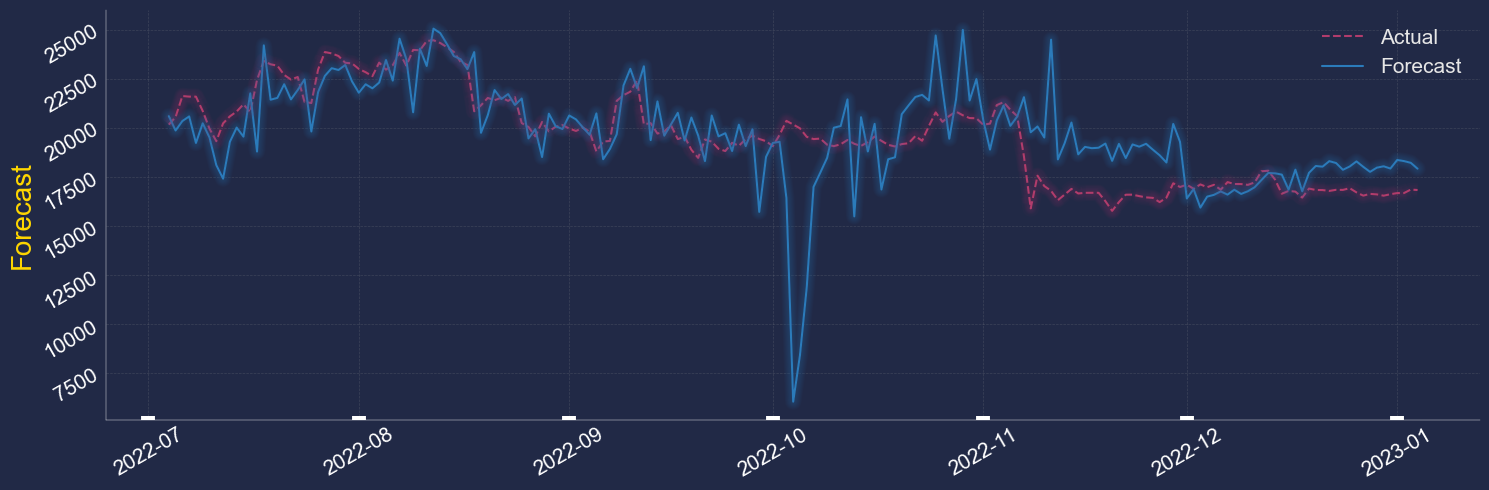

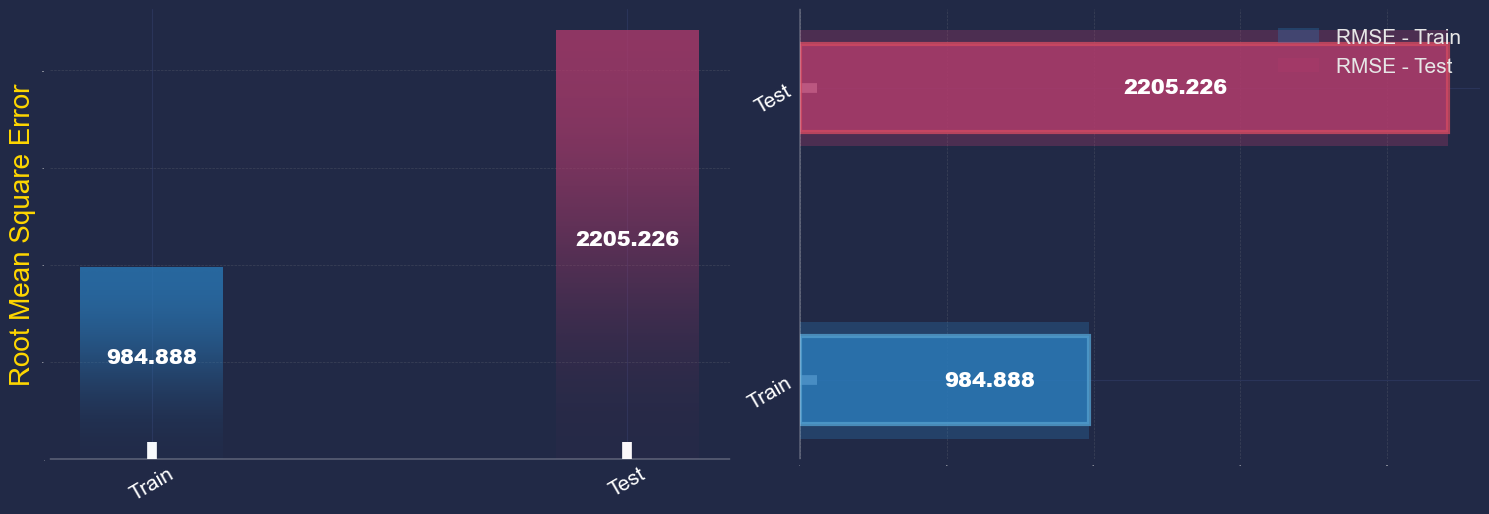

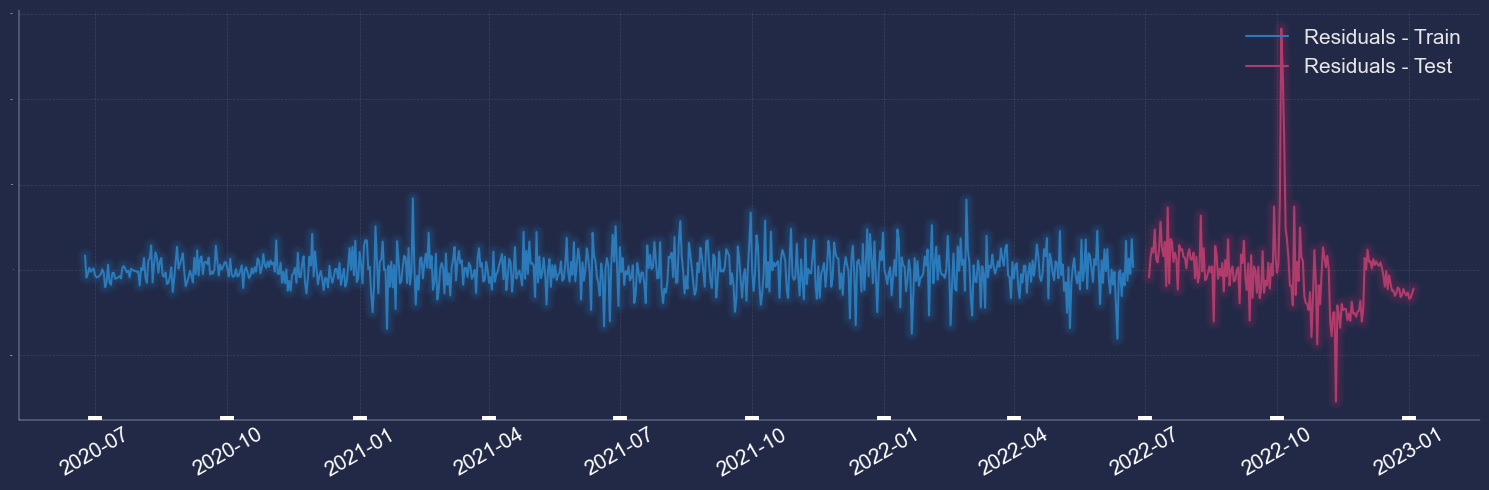

In [7]:
df1 = df.copy()

df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)

df1 = df1[df1.index <= '2023-01-05']
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  380
--- End Correlation()


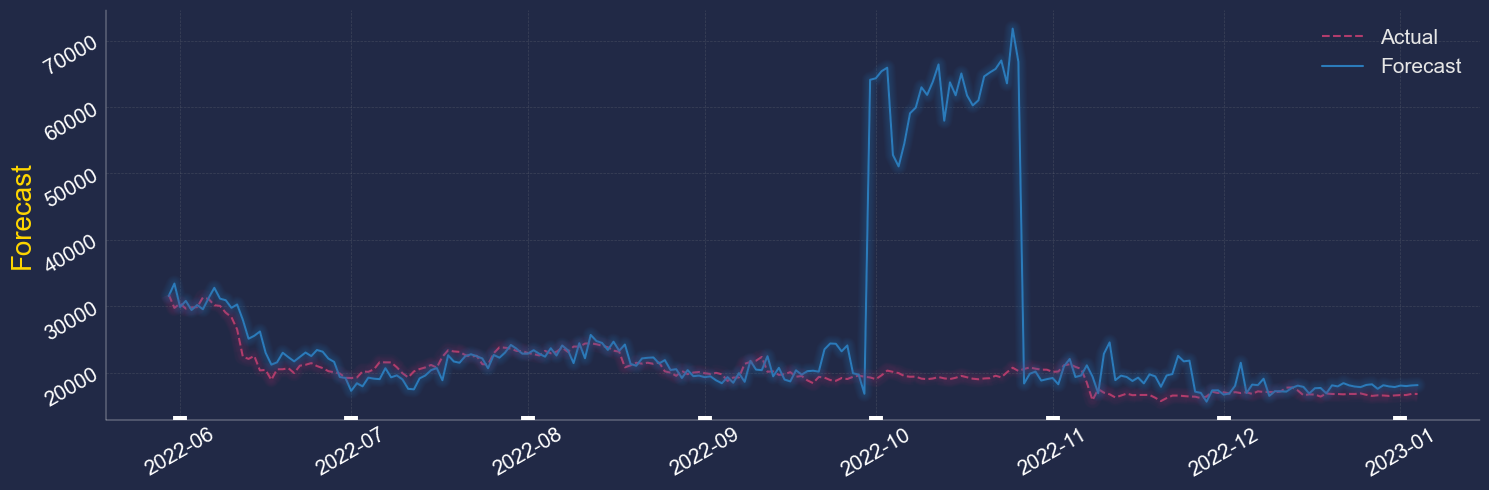

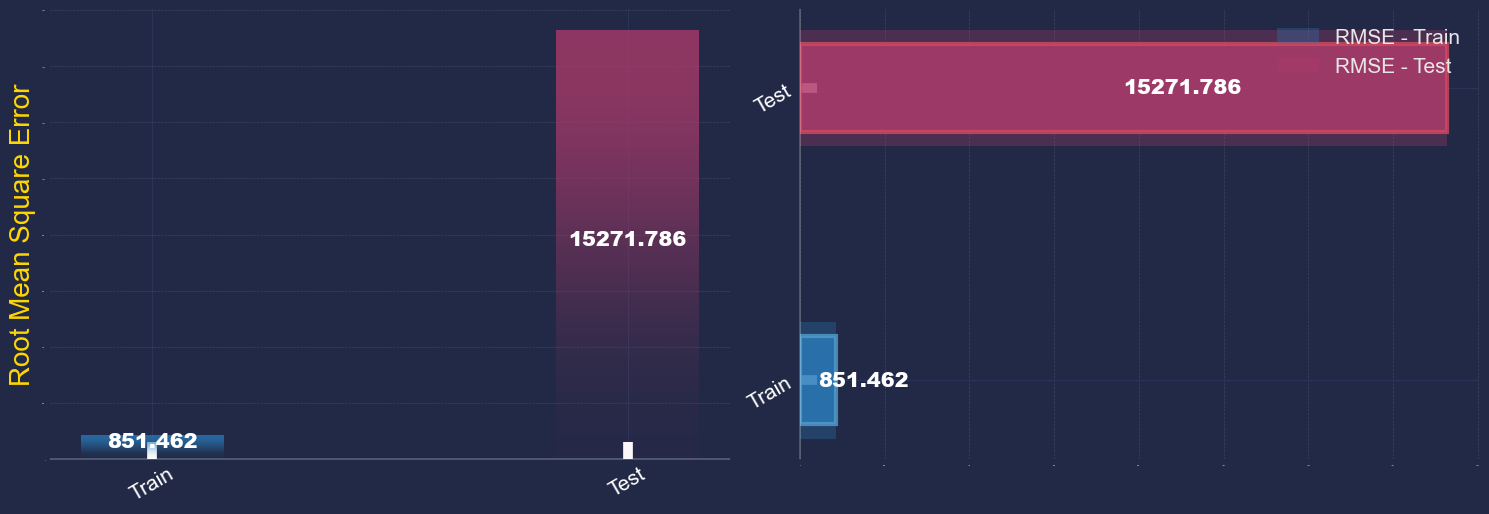

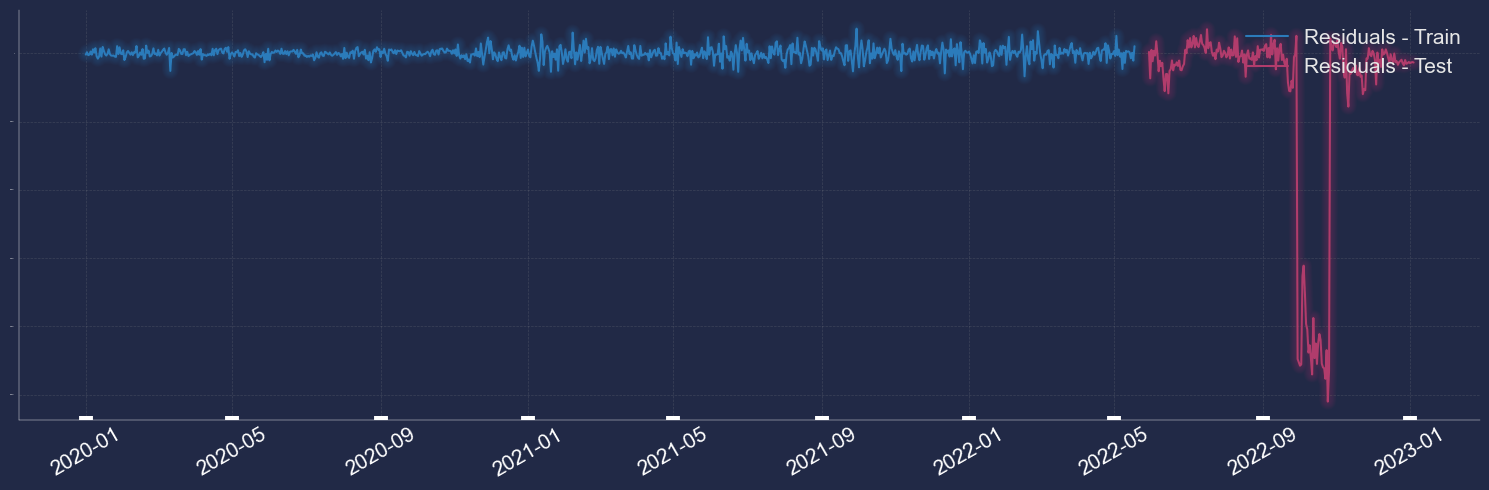

In [8]:
df1 = df.copy()

df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)

df1 = df1[df1.index <= '2023-01-05']
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  283
--- End Correlation()


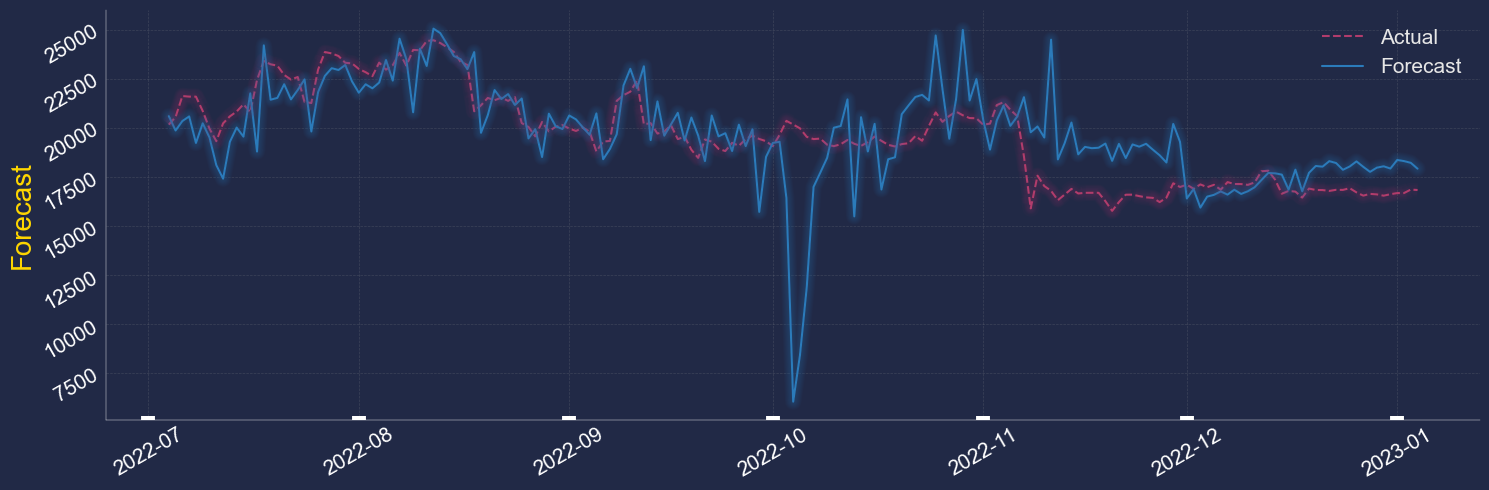

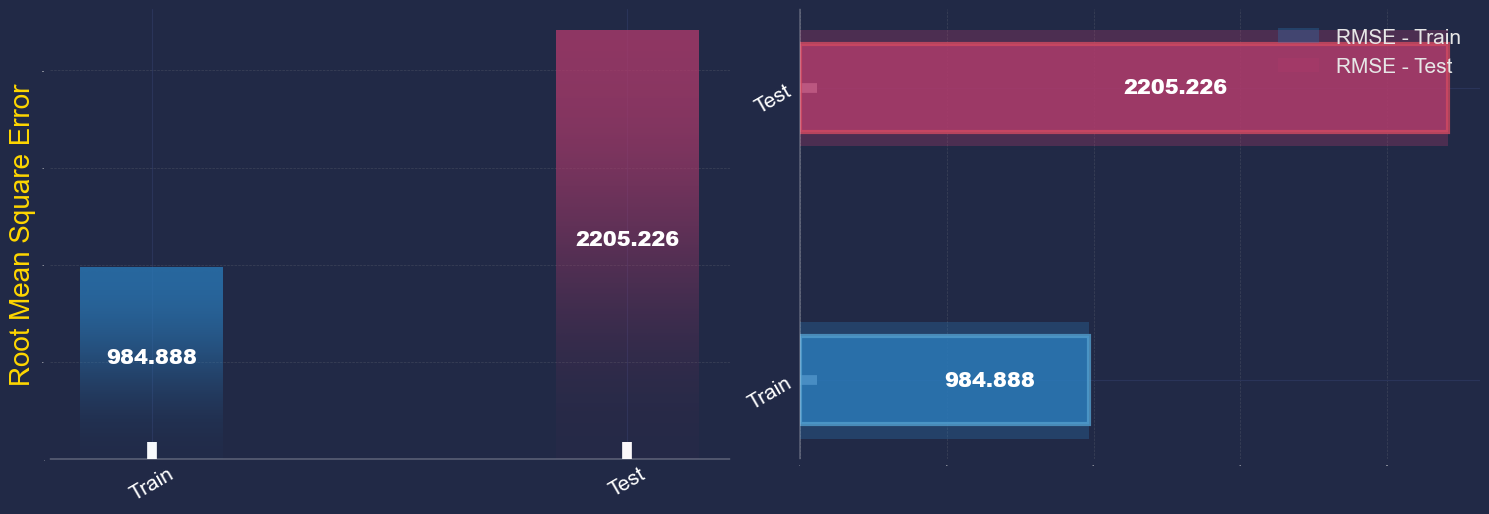

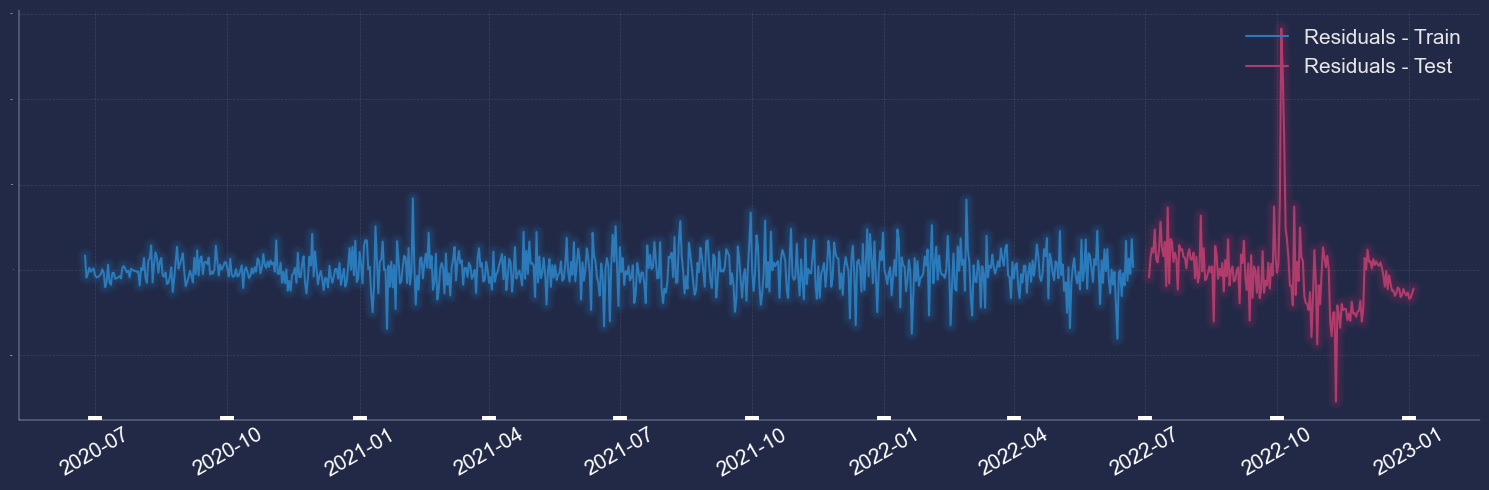

In [9]:
df1 = df.copy()

df1 = Preprocessing.Drop_Holidays_Values(dataframe=df1)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)

df1 = df1[df1.index <= '2023-01-05']
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  380
--- End Correlation()


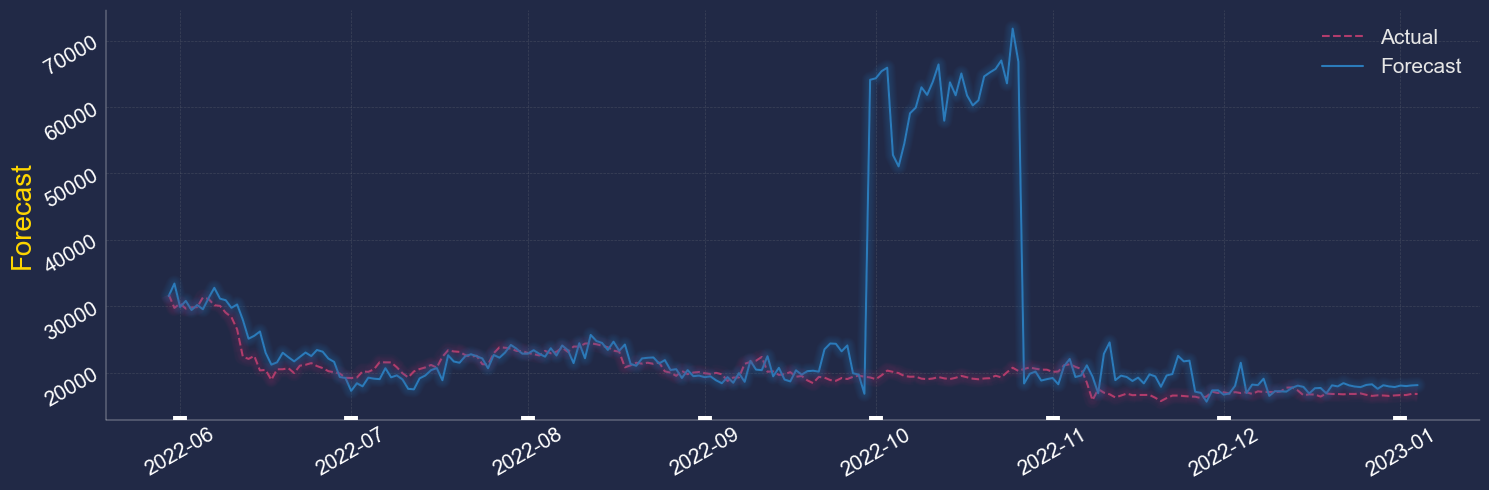

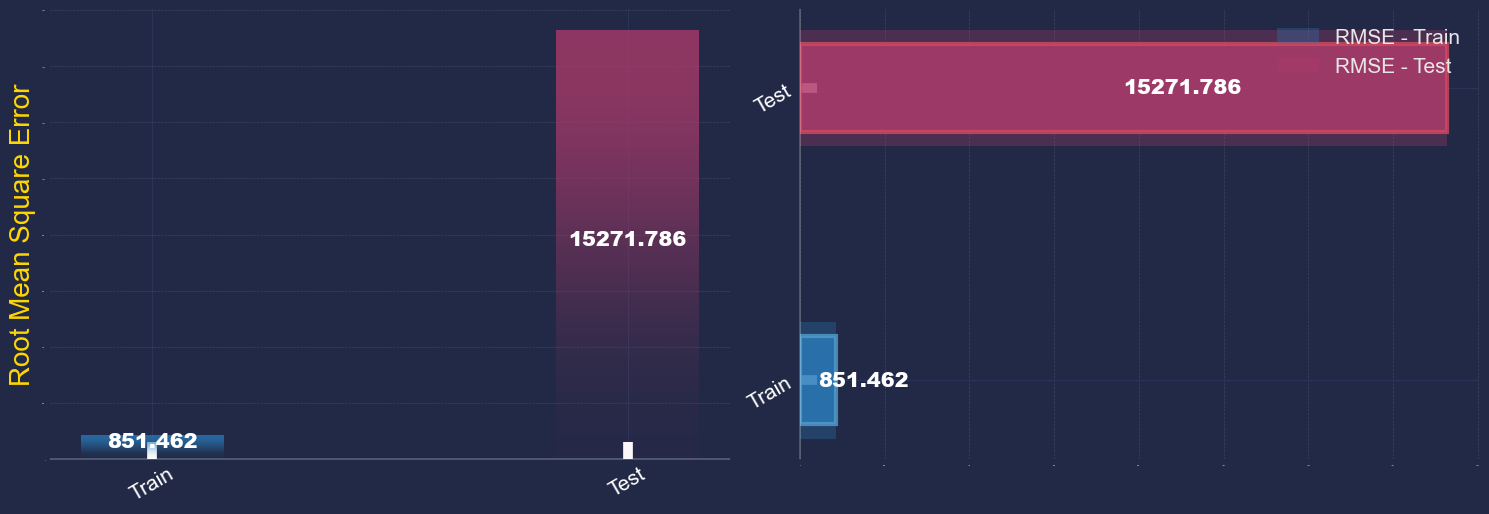

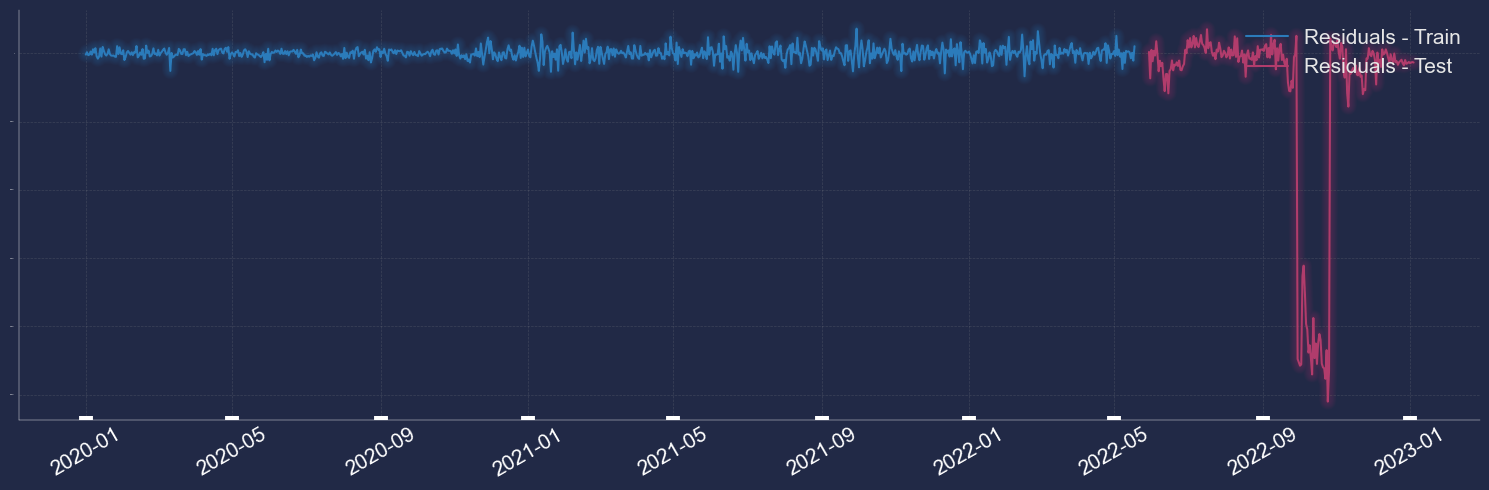

In [10]:
df1 = df.copy()

df1 = Preprocessing.Drop_Holidays_Values(dataframe=df1)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = df1[df1.index <= '2023-01-05']
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

---

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  163
--- End Correlation()


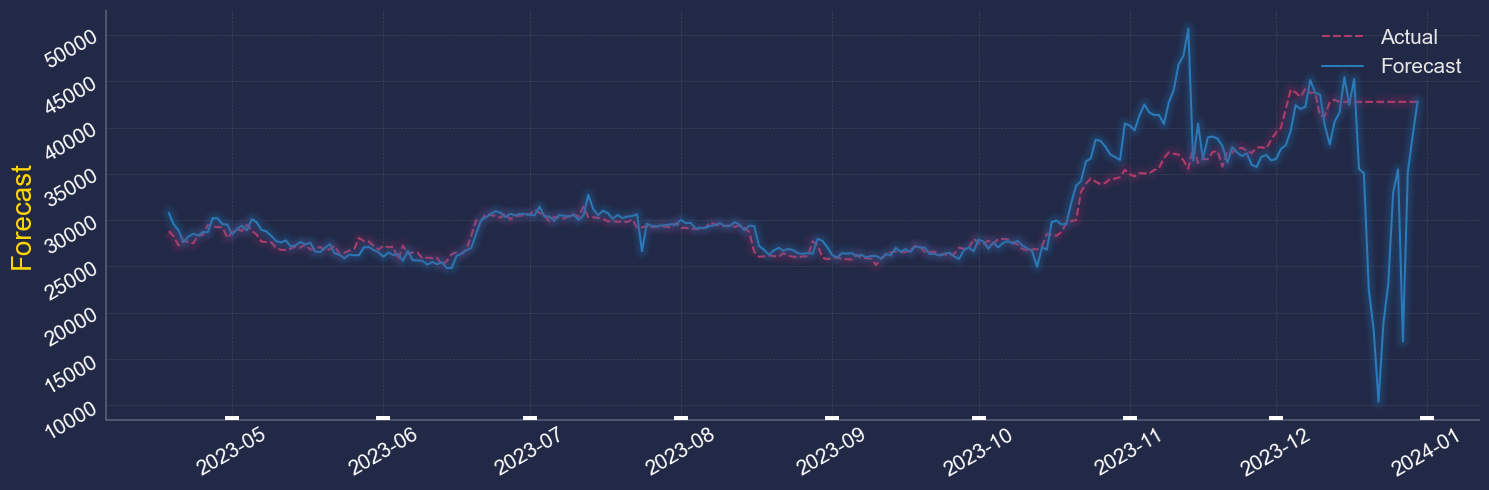

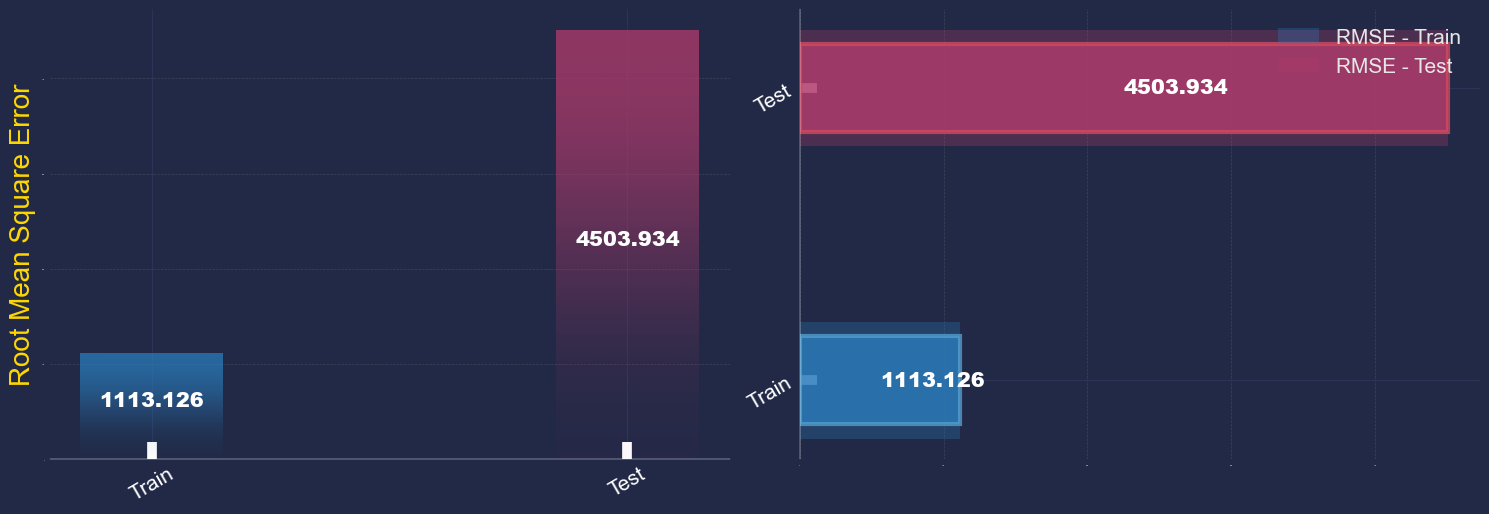

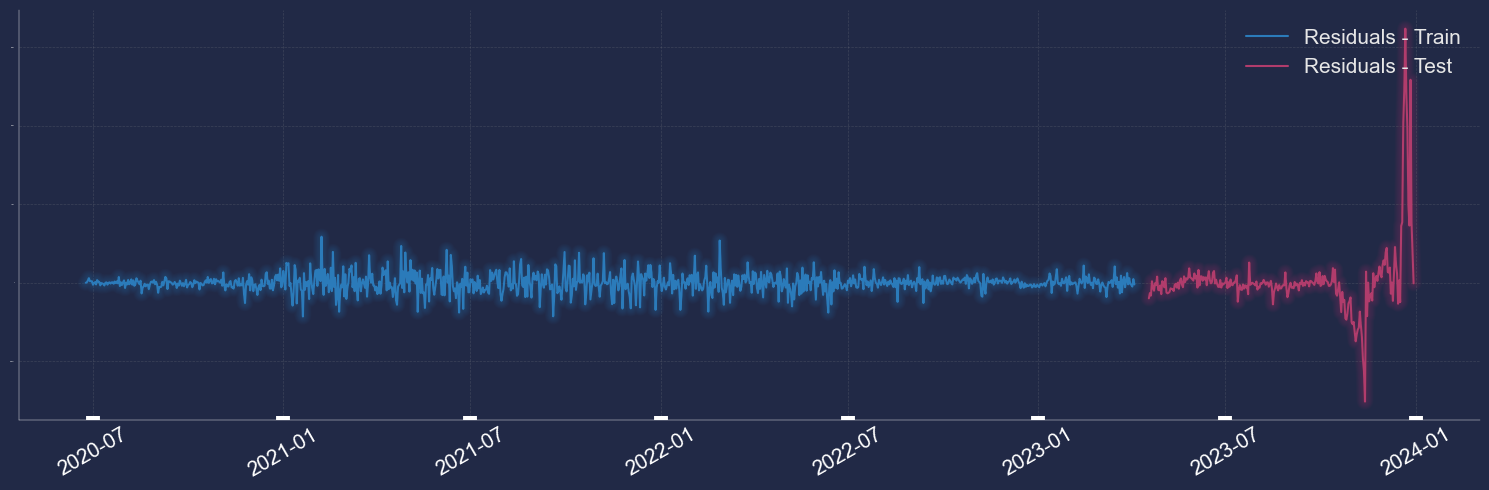

In [11]:
df1 = df.copy()

df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  338
--- End Correlation()


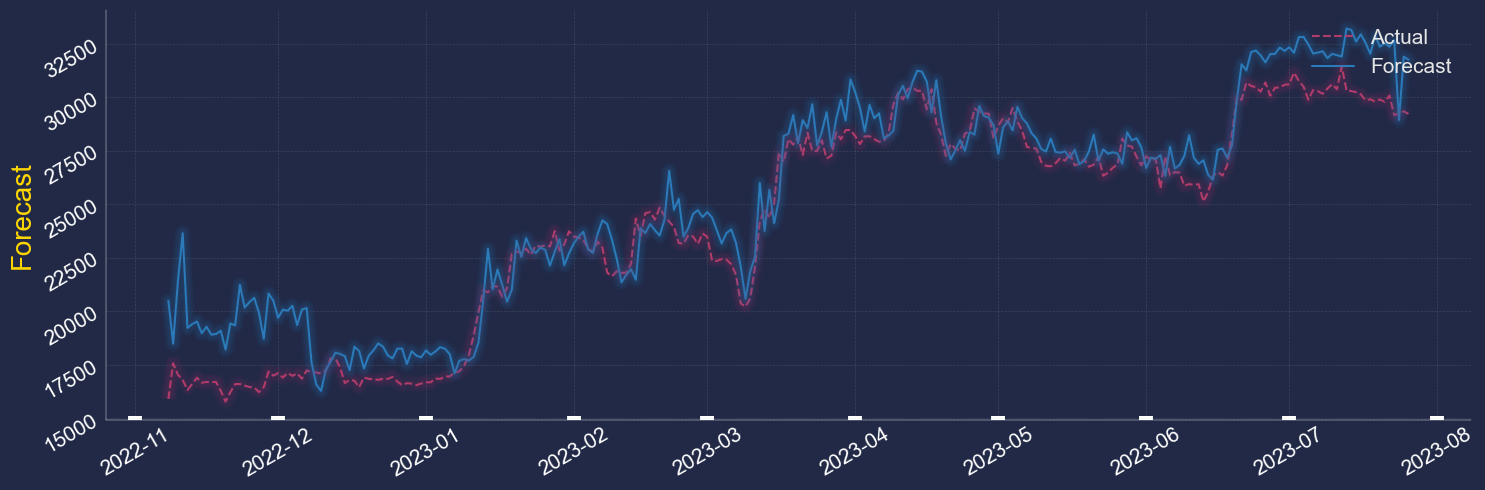

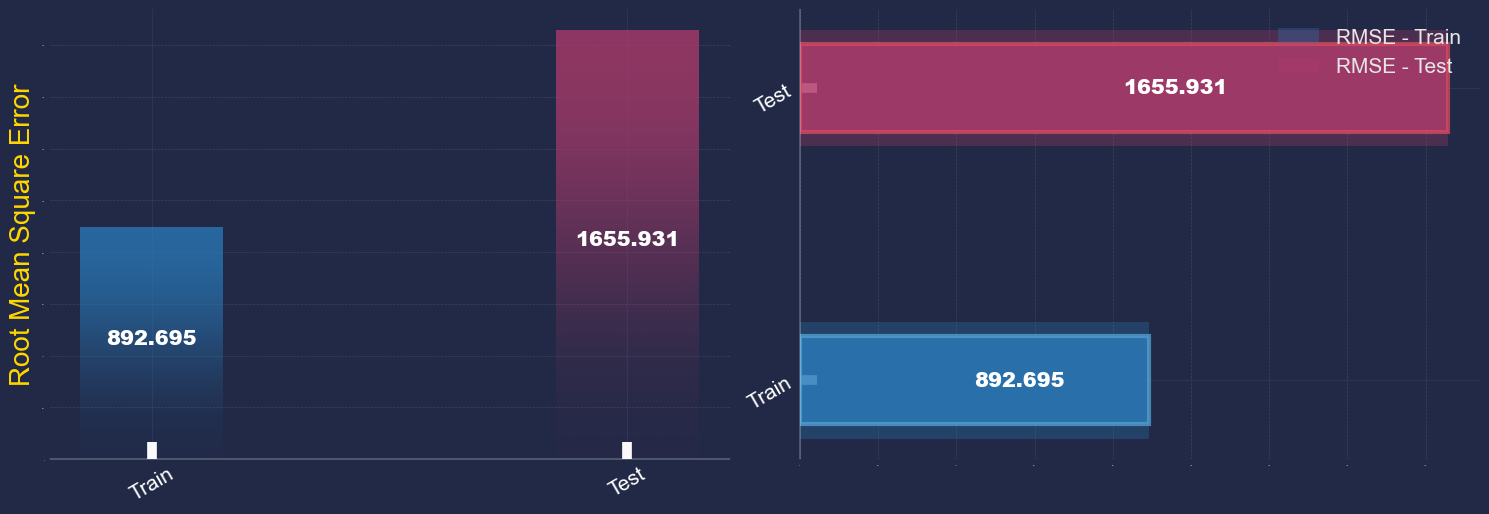

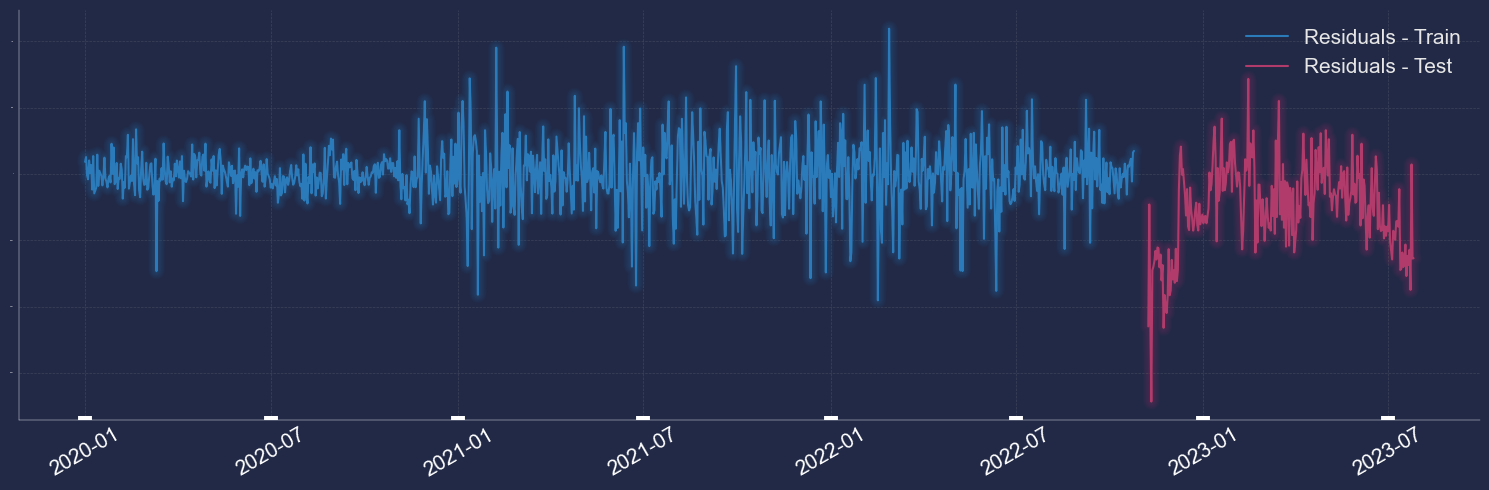

In [12]:
df1 = df.copy()

df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  163
--- End Correlation()


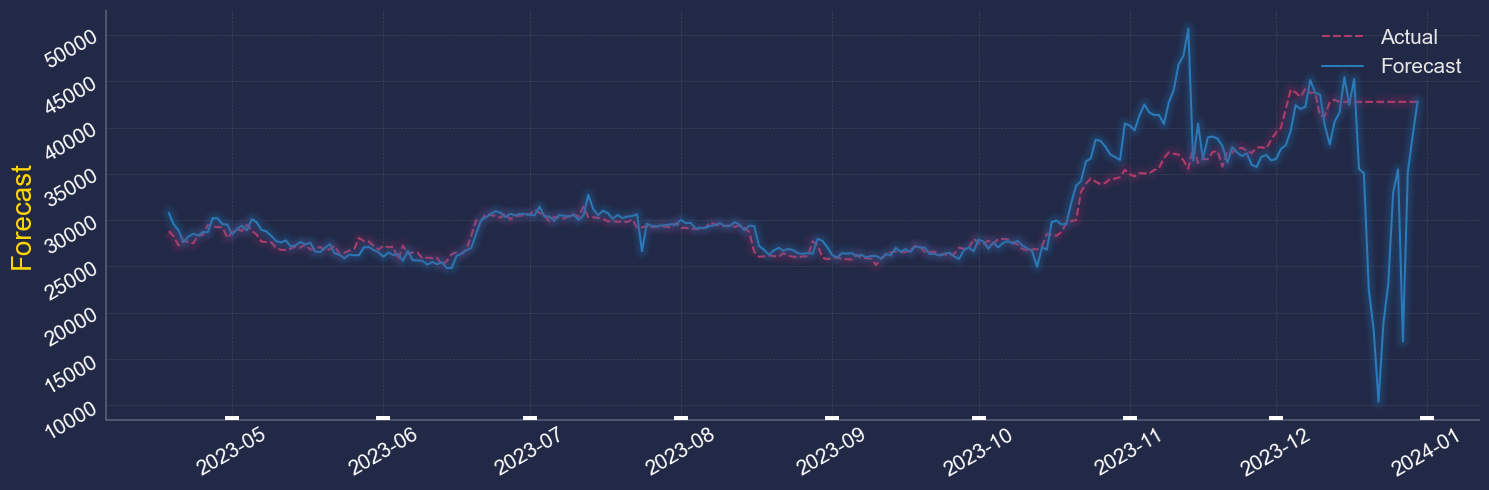

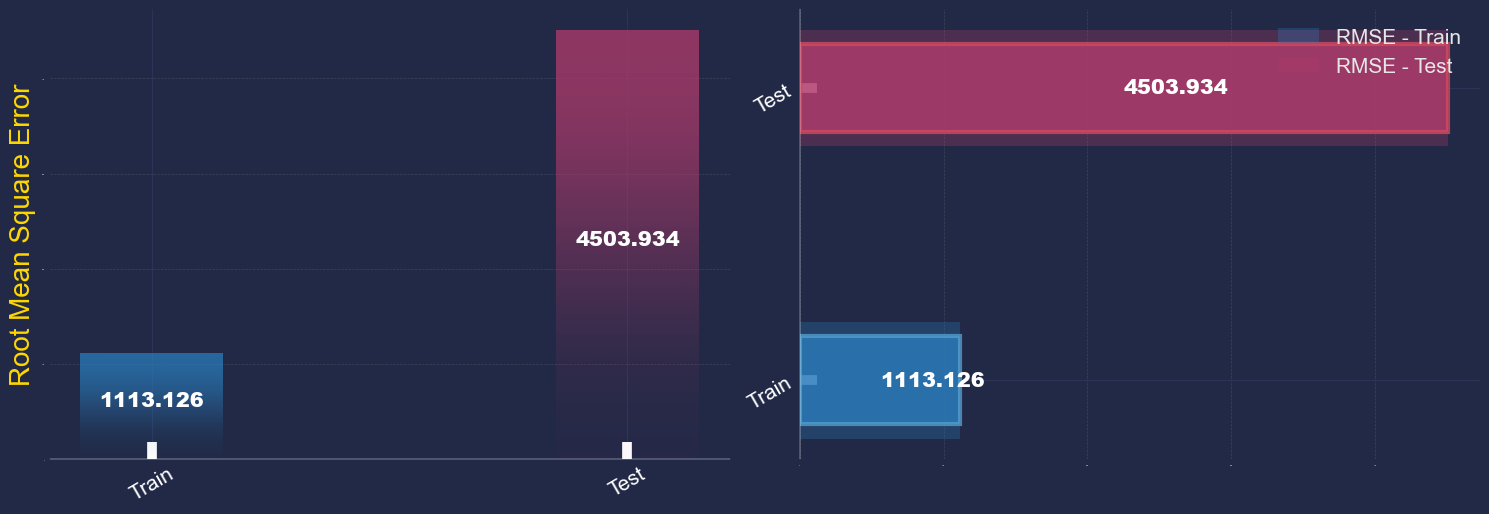

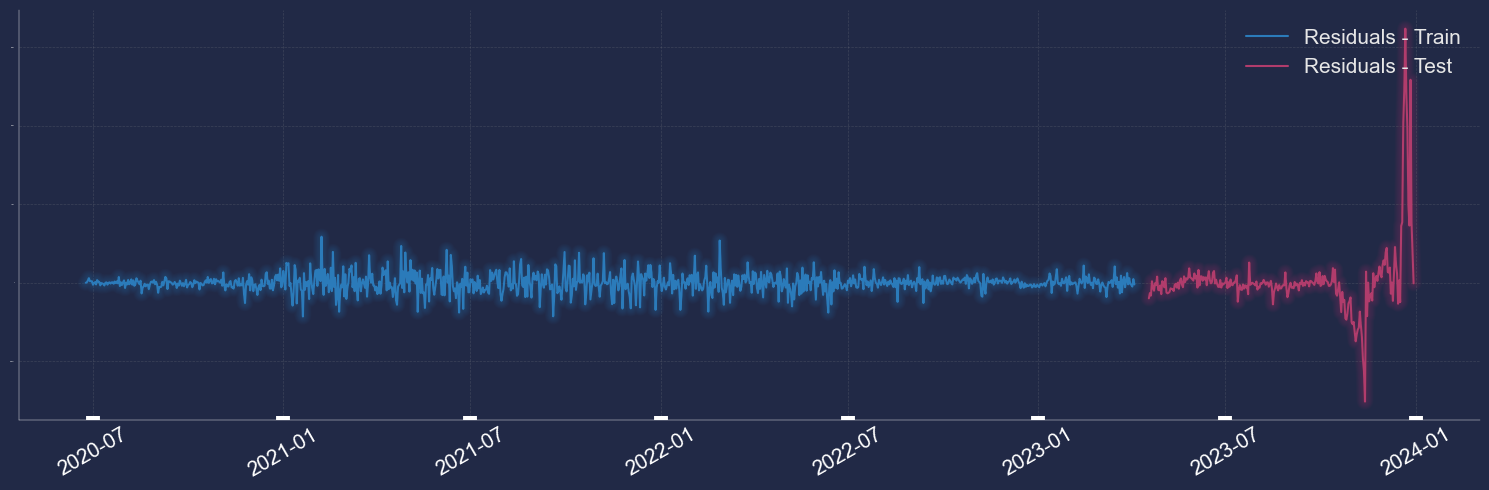

In [14]:
df1 = df.copy()

df1 = Preprocessing.Drop_Holidays_Values(dataframe=df1)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

--- Start Drop_Holidays_Values()
.
.
--- End Drop_Holidays_Values()
--- Start Forward_Fill_Data()
.
.
--- End Forward_Fill_Data()

--- Start Backrward_Fill_Data()
.
.
--- End Backrward_Fill_Data()

--- Start Select_Target()
.
Target:  BTCBUSD_Close 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.8  -  0.8 )
Length of Dataframe is:  338
--- End Correlation()


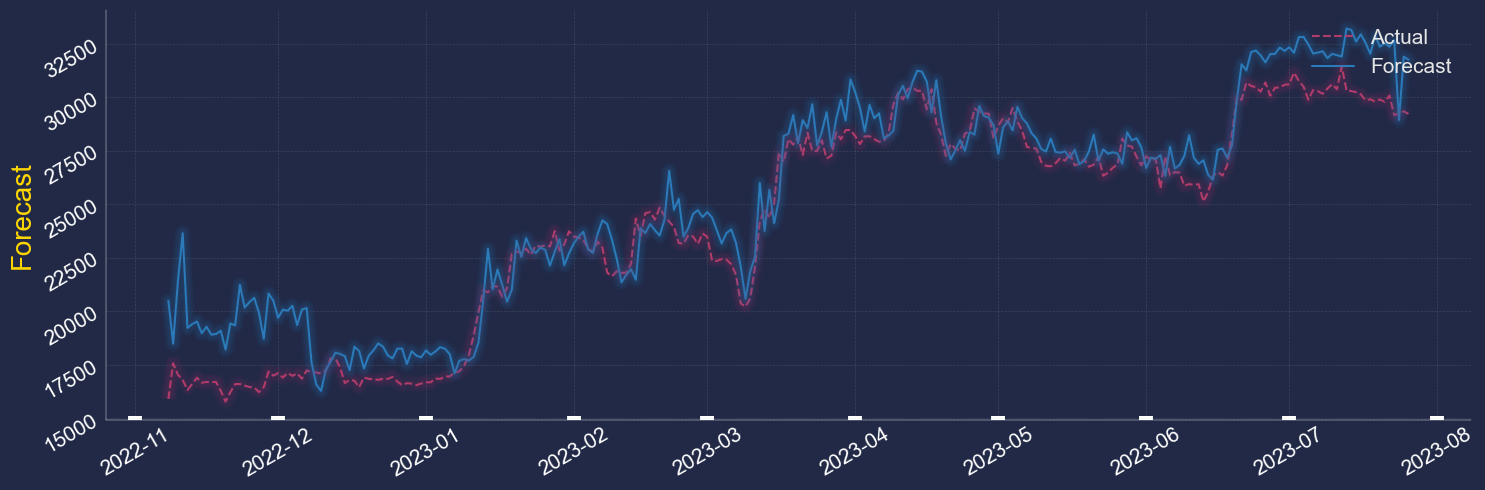

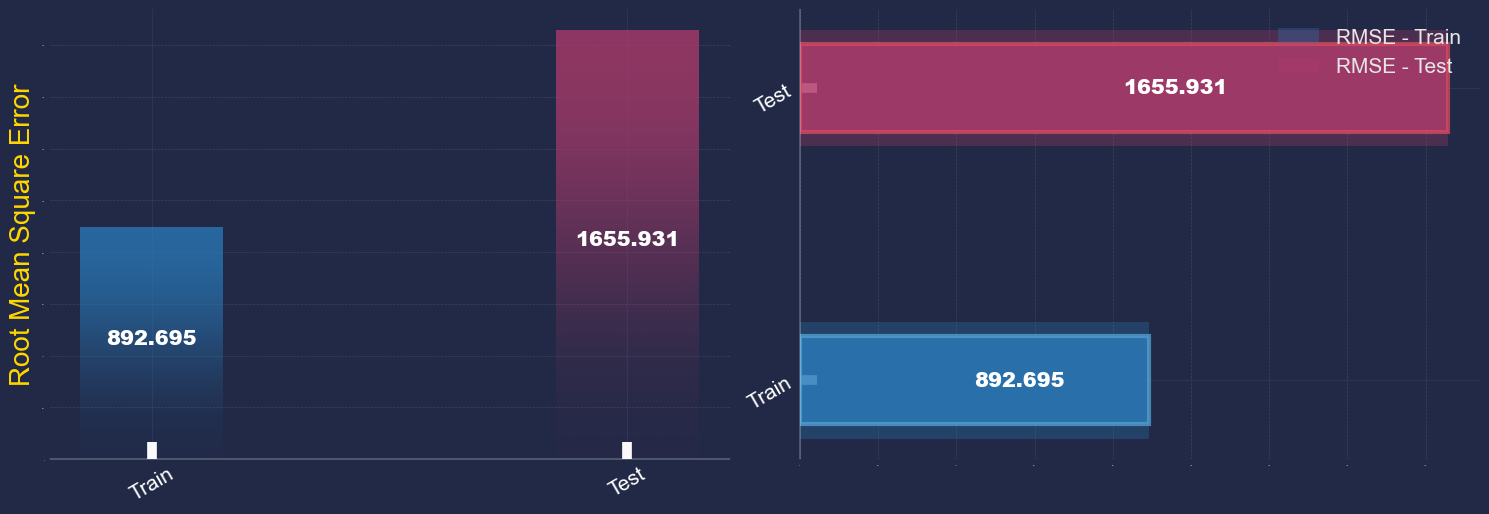

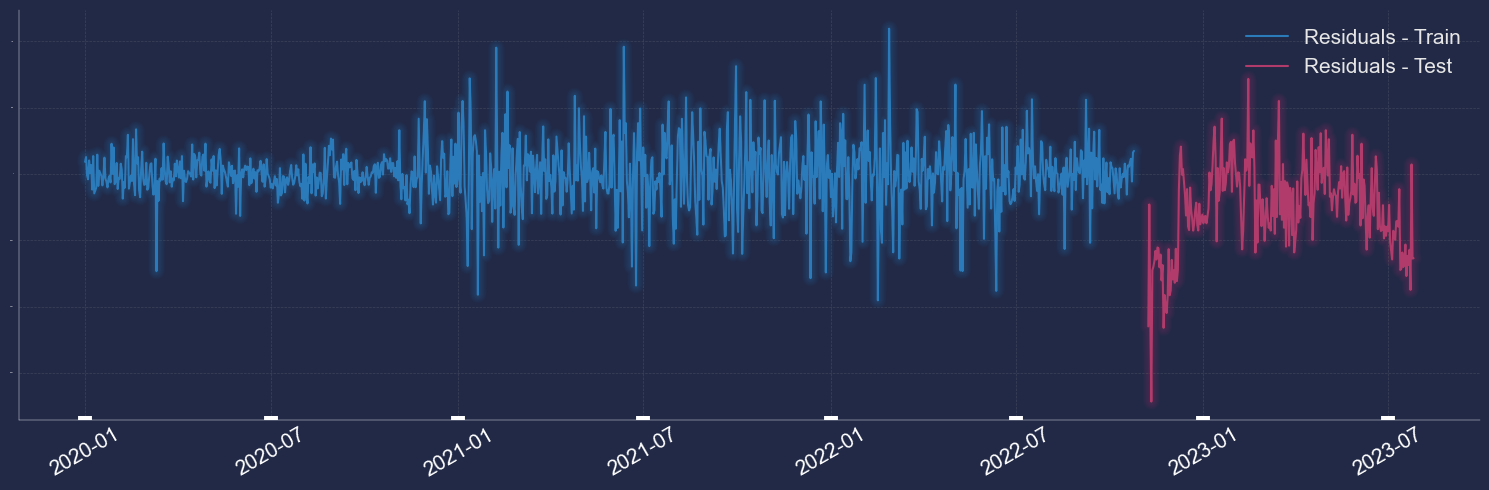

In [15]:
df1 = df.copy()

df1 = Preprocessing.Drop_Holidays_Values(dataframe=df1)
df1 = Preprocessing.Forward_Fill_Data(dataframe=df)
df1 = Preprocessing.Backrward_Fill_Data(dataframe=df)
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Close', number=0.8)

Plots.Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)


---

In [54]:
def Recursive_Forecast_Plot_Split(dataframe, model):
    '''
    This function visualize 3 plots with Recursive Forecast method
    1) Actual and Forecast Price
    2) The Metric of Forecast (RMSE)
    3) The Residuals of Forecast
    ------------------------------
    Parameter(dataframe): DataFrame
    Parameter(model): A Model (With parameters or not)
    ------------------------------
    '''
    
    try:
        prediction = [] #Create a list value
    
        X = dataframe.iloc[:, 1:]
        y = dataframe.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #80% X_train - 20% X_test
    
        Xtrain = X_train.copy()
        Xtest = X_test.copy()
        ytrain = y_train.copy()
        ytest = y_test.copy()

        model_train_predict = model.fit(Xtrain, ytrain) #Fit the model

        #------------ Plot 1,4 ------------#
        index = y_train.index.copy()
        index = pd.to_datetime(index) #y_test index
        
        forecast_index = y_test.index.copy()
        forecast_index = pd.to_datetime(forecast_index) #y_test index
        #------------ Plot 1,4 ------------#
        #print(len(index))
        #print(len(model_train_predict))
        #print(model_train_predict)
        #------------ Drop the Xtest rows and Fit again the Xtrain ------------#
        while len(Xtest) > 0:    
            if len(Xtest) >= 30:
            
                model.fit(Xtrain, ytrain) #Fit the model
                forecast = model.predict(Xtest.iloc[0:30]).tolist() #Predict the days
                prediction = prediction + forecast #Insert the forecast values in prediction
        
                Xtrain = pd.concat([Xtrain, Xtest.iloc[0:30]]) #Insert values from second dataframe to first
                ytrain = pd.concat([ytrain, ytest.iloc[0:30]]) #Insert values from second dataframe to first
        
                Xtest.drop(Xtest.index[range(30)], inplace=True) #Drop Rows
                ytest.drop(ytest.index[range(30)], inplace=True) #Drop Rows

            else:
                forecast = model.predict(Xtest).tolist() #Predict the days
                prediction = prediction + forecast #Insert the forecast values in prediction
                break;
    #------------ Drop the Xtest rows and Fit again the Xtrain ------------#
    
    #print('X_train: ', X_train.shape, '\nXtrain: ', Xtrain.shape, '\n\n',
    #      'y_train: ', y_train.shape, '\nytrain: ', ytrain.shape)
    #print()
    #print('X_test: ', X_test.shape, '\nXtest: ', Xtest.shape, '\n\n',
    #      'y_test: ', y_test.shape, '\nytest: ', ytest.shape)
    #print()
    #print('Prediction: ', len(prediction))
    
        plt.style.use("cyberpunk") #Background color
        pal_red = sns.color_palette("flare") #Color
        pal_blue = sns.color_palette("Blues") #Color
    
#------------------------------------------------------------------------------------------------------------------------------#
    
        #------------ Plot 1 ------------#
        fig, ax1 = plt.subplots(figsize=(15,5), tight_layout=True) #Size of plot dpi=300 for better quality

        ax1.plot(index, y_train, label='AAA', color=pal_red[0])
        #ax1.plot(index, model_train_predict, color=pal_blue[0])

        ax1.plot(forecast_index, y_test, ls='--', label='OOO', color=pal_red[3])
        ax1.plot(forecast_index, prediction, label='III', color=pal_blue[4])

        plt.ylabel('Forecast', fontsize=20, color='Gold') #Bottom title
        #plt.legend(['Actual','Forecast'], loc="upper right", fontsize=15) #Label - Size of plot
        plt.tick_params(axis='x', labelrotation=30, labelsize=15, width=10, length=3,  direction="in", colors='White') #Rotation label x and y
        plt.tick_params(axis='y', labelrotation=30, labelsize=15, colors='White') #Rotation label x and y
        plt.grid(zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot

        mplcp.make_lines_glow()
        #mplcp.make_lines_glow(alpha_line=0.5, n_glow_lines=10,  diff_linewidth=1.05) #Glow - Effect lines

        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['left'].set_color('White')
        ax1.spines['left'].set_linewidth(0.3)
        ax1.spines['bottom'].set_color('White')
        ax1.spines['bottom'].set_linewidth(0.3)
        plt.show()
        #------------ Plot 1 ------------#
    
#------------------------------------------------------------------------------------------------------------------------------#



#------------------------------------------------------------------------------------------------------------------------------#
    
        #------------ Plot 2,3 ------------#
        metric_train = model.predict(X=Xtrain).tolist()
    
        Train_MSE = mean_squared_error(ytrain, metric_train)
        Train_RMSE = math.sqrt(Train_MSE)
        Train_RMSE = round(Train_RMSE,3)
        
        Test_MSE = mean_squared_error(y_test, prediction)
        Test_RMSE = math.sqrt(Test_MSE)
        Test_RMSE = round(Test_RMSE,3)

        Metric_data = pd.DataFrame(data={'Train' : [Train_RMSE],
                                         'Test' : [Test_RMSE]})
        #Metric_data.astype(float)
    
        fig = gridspec.GridSpec(3, 2)
        pl.figure(figsize=(15, 15), tight_layout=True)

        ax2 = pl.subplot(fig[0, 0])
        plt.ylabel('Root Mean Square Error', fontsize=20, color='Gold') #Bottom title
    
        bar1 = ax2.bar(Metric_data.columns[0], Metric_data['Train'], width=0.3, linewidth=3, alpha=0.8, bottom=0, edgecolor=pal_blue[3], color=pal_blue[4])
        bar2 = ax2.bar(Metric_data.columns[1], Metric_data['Test'], width=0.3, linewidth=3, alpha=0.8, bottom=0, edgecolor=pal_red[2], color=pal_red[3])
    
        ax2.tick_params(axis='x', width=7, length=12, labelrotation=30, labelsize=15, bottom=True, direction="in", colors='White') #White
        ax2.tick_params(axis='y', labelsize=0) #White
        #ax2.tick_params(axis='y', labelsize=0) #Rotation label x and y
        #ax2.tick_params(axis='y', labelrotation=30, labelsize=15, left=False, colors='White') #White
        ax2.tick_params(axis='x', width=7, length=12, labelrotation=30, labelsize=15, bottom=True, direction="in", left=False, colors='White') #White
        ax2.grid(axis='y', zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot

        ax2.text(x=Metric_data.Train.name, y=Metric_data.Train.sum()/2, s=Metric_data.Train[0], color='White', weight='extra bold', ha='center', fontsize=15) #Text of labels
        ax2.text(x=Metric_data.Test.name, y=Metric_data.Test.sum()/2, s=Metric_data.Test[0], color='White', weight='extra bold', ha='center', fontsize=15) #Text of labels

        mplcp.add_bar_gradient(bars=bar1)
        mplcp.add_bar_gradient(bars=bar2)
    
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_color('White')
        ax2.spines['bottom'].set_linewidth(0.3)



        ax3 = pl.subplot(fig[0, 1])
        
        ax3.barh(Metric_data.columns[0], Metric_data['Train']+0.1, height=0.4, linewidth=3, alpha=0.3, left=0, color=pal_blue[4])
        ax3.barh(Metric_data.columns[1], Metric_data['Test']+0.1, height=0.4, linewidth=3, alpha=0.3, left=0, color=pal_red[3])
    
        ax3.barh(Metric_data.columns[0], Metric_data['Train'], height=0.3, linewidth=3, alpha=0.8, left=0, edgecolor=pal_blue[3], color=pal_blue[4])
        ax3.barh(Metric_data.columns[1], Metric_data['Test'], height=0.3, linewidth=3, alpha=0.8, left=0, edgecolor=pal_red[2], color=pal_red[3])
    
        ax3.legend(['RMSE - Train','RMSE - Test'], loc="upper right", fontsize=15) #Label - Size of plot
        ax3.tick_params(axis='y', width=7, length=12, labelrotation=30, labelsize=15, left=True, bottom=False, direction="in", colors='White')
        ax3.tick_params(axis='x', labelsize=0) #Rotation label x and y
        ax3.grid(axis='x', zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot
        #ax3.tick_params(axis='x', labelrotation=30, labelsize=15, bottom=False, colors='White')

        ax3.text(x=Metric_data.Train.sum()/2, y=Metric_data.Train.name, s=Metric_data.Train[0], color='White', weight='extra bold', va='center', fontsize=15) #Text of labels
        ax3.text(x=Metric_data.Test.sum()/2, y=Metric_data.Test.name, s=Metric_data.Test[0], color='White', weight='extra bold', va='center', fontsize=15) #Text of labels
    
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['left'].set_color('White')
        ax3.spines['left'].set_linewidth(0.3)
        plt.show()
        #------------ Plot 2,3 ------------#
    
#------------------------------------------------------------------------------------------------------------------------------#



#------------------------------------------------------------------------------------------------------------------------------#
    
        length_of_dataframe = int(len(dataframe) * 0.79)

        #------------ Plot 4 ------------#
        Residuals_Train = ytrain - metric_train
        Residuals_Test = y_test - prediction
    
        Residuals_data_train = pd.DataFrame(data={'Residuals_Train' : Residuals_Train})
        Residuals_data_test = pd.DataFrame(data={'Residuals_Test' : Residuals_Test})

        residuals_index_train = Residuals_data_train.index.copy()
        residuals_index_train = pd.to_datetime(residuals_index_train) #Residuals intex train
    
        fig, ax4 = plt.subplots(figsize=(15,5), tight_layout=True) #Size of plot dpi=300 for better quality

        ax4.plot(residuals_index_train[0:length_of_dataframe], Residuals_data_train.Residuals_Train[0:length_of_dataframe], color=pal_blue[4])
        ax4.plot(forecast_index, Residuals_data_test.Residuals_Test.values, color=pal_red[3])
        ax4.legend(['Residuals - Train','Residuals - Test'], loc="upper right", fontsize=15) #Label - Size of plot

        ax4.tick_params(axis='x', labelrotation=30, labelsize=15, width=10, length=3, direction="in", colors='White') #Rotation label x and y
        ax4.tick_params(axis='y', labelsize=0) #White
        #ax4.tick_params(axis='y', labelrotation=30, labelsize=15, colors='White') #Rotation label x and y
        ax4.grid(zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot
    
        mplcp.make_lines_glow()

        ax4.spines['top'].set_visible(False)
        ax4.spines['right'].set_visible(False)
        ax4.spines['left'].set_color('White')
        ax4.spines['left'].set_linewidth(0.3)
        ax4.spines['bottom'].set_color('White')
        ax4.spines['bottom'].set_linewidth(0.3)
        plt.show()
        #------------ Plot 4 ------------#
    except:
        print('No option!\nError')

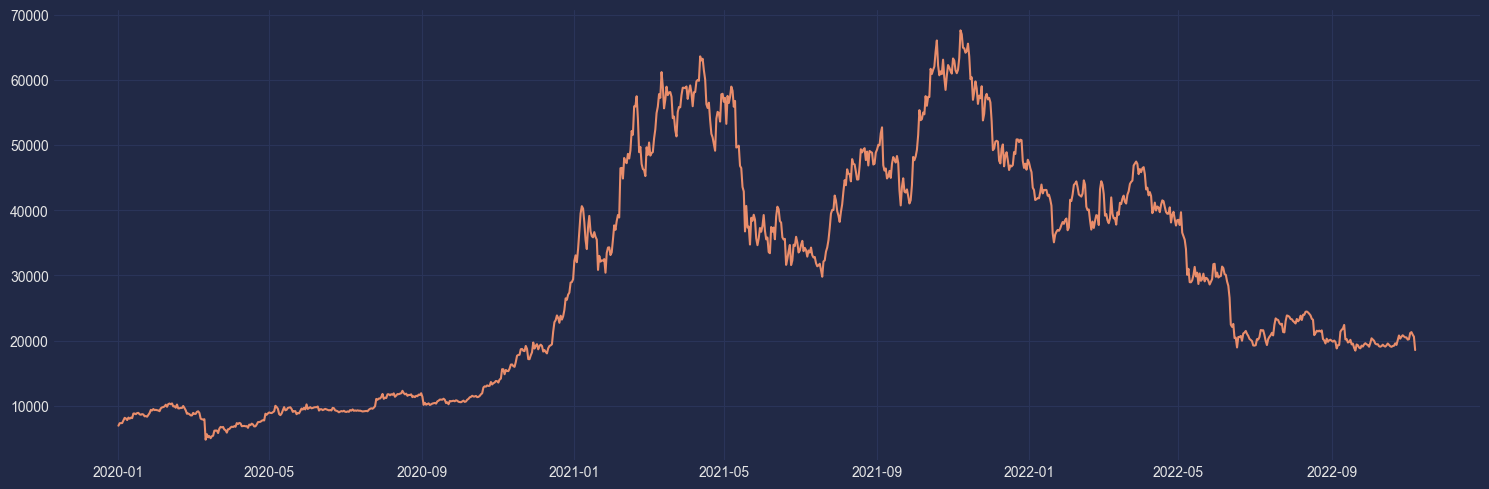

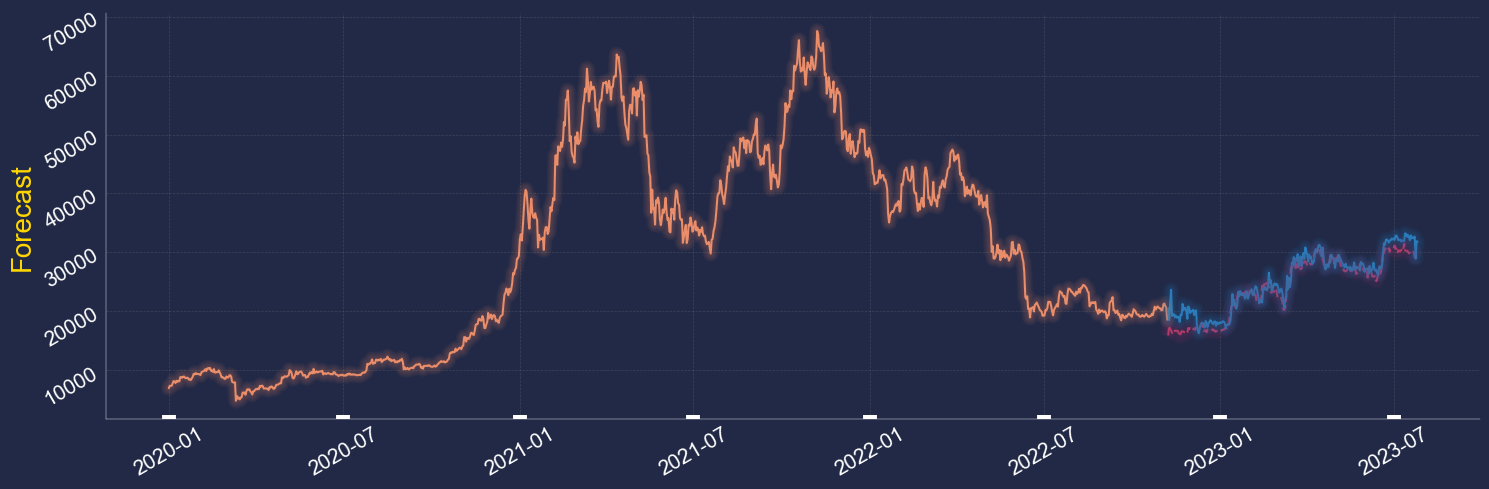

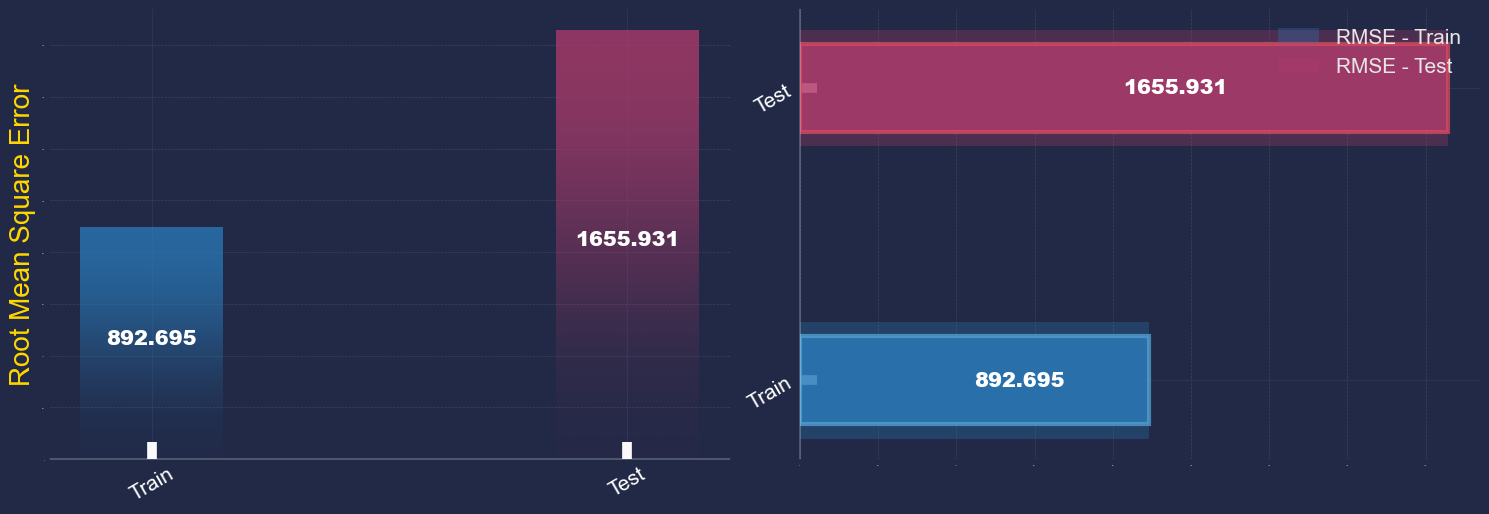

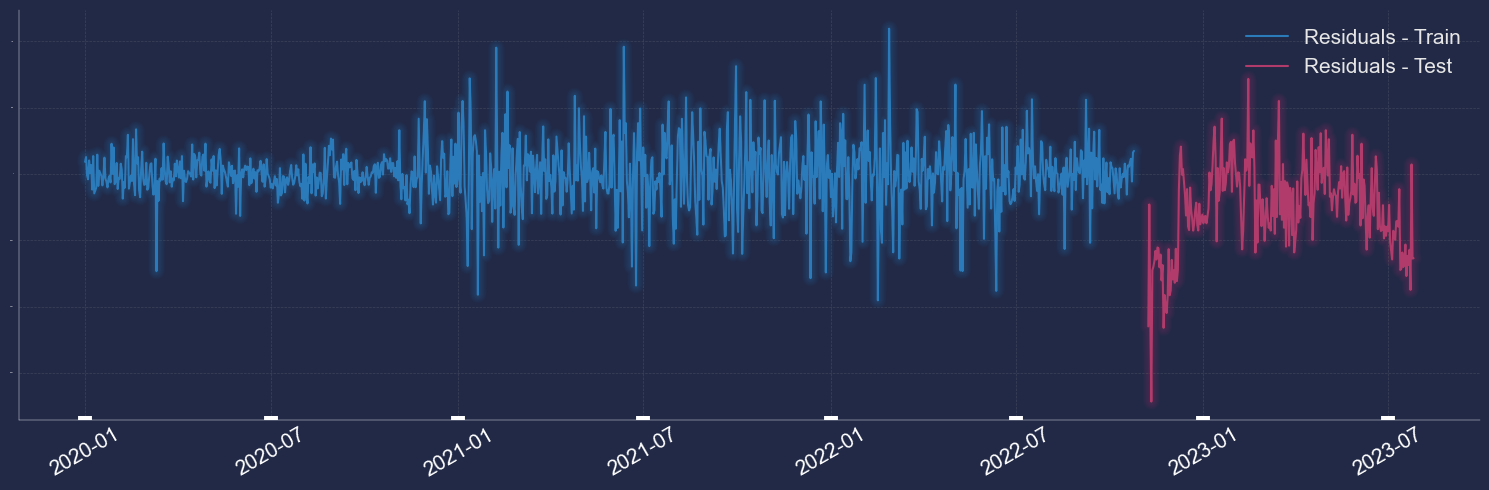

In [55]:
Recursive_Forecast_Plot_Split(dataframe=df1, model=lr)

In [70]:
df1 = df.copy()

df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCUAH_Open')
#df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Open')
#df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Close')

X = df1.iloc[:, 1:]
Y = df1.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)  # 80% X_train - 20% X_test

--- Start Select_Target()
.
Target:  BTCUAH_Open 
.
--- End Select_Target()



In [71]:
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [72]:
data = pd.DataFrame(y_test)
data['Forecast'] = lr_pred
data

Target_BTCUAH_Open      Forecast
Open time                                   
2022-06-16            722491.0  7.148552e+05
2022-06-17            728311.0  7.207733e+05
2022-06-18            672338.0  6.861070e+05
2022-06-19            725340.0  7.399991e+05
2022-06-20            721212.0  7.304581e+05
...                        ...           ...
2023-07-22           1149107.0  1.149544e+06
2023-07-23           1157905.0  1.151250e+06
2023-07-24           1122637.0  1.138132e+06
2023-07-25           1132000.0  1.131922e+06
2023-07-26           1133979.0  1.130015e+06

[179 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

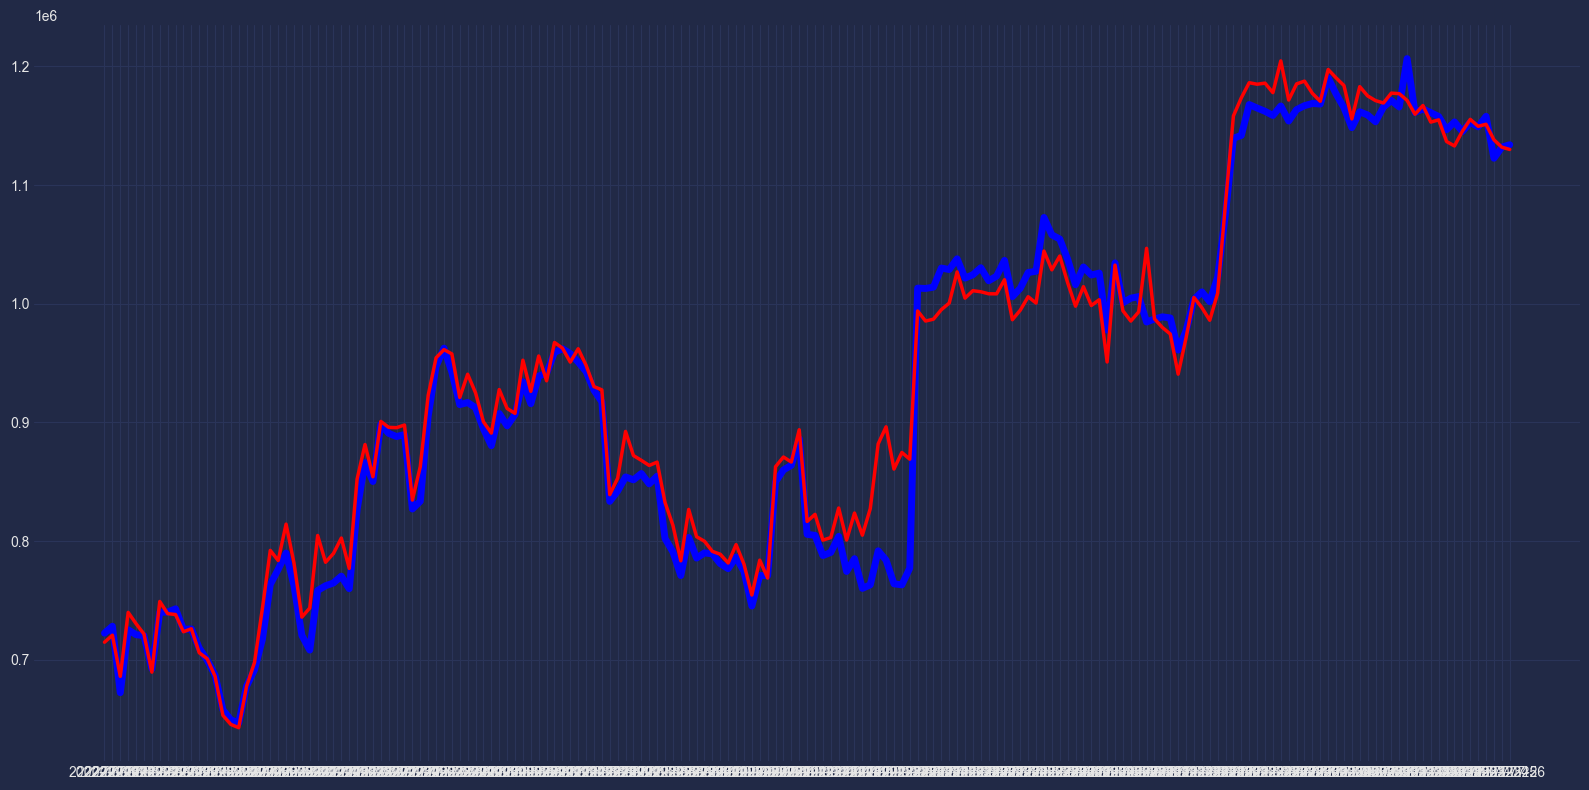

In [74]:
plt.figure(figsize=(16, 8),  tight_layout=True)

plt.plot(data.index, data['Target_BTCUAH_Open'], linewidth=5, color='Blue')
plt.plot(data.index, data['Forecast'], linewidth=2.5, color='Red')

plt.show()

In [75]:
df1

Target_BTCUAH_Open  ETHBTC_Open  ETHBTC_High  ETHBTC_Low  \
Open time                                                              
2020-06-24            245427.0     0.025264     0.025820    0.025041   
2020-06-25            245755.0     0.025233     0.025347    0.025087   
2020-06-26            241593.0     0.025137     0.025222    0.025019   
2020-06-27            239205.0     0.025062     0.025162    0.024158   
2020-06-28            241099.0     0.024514     0.024822    0.024400   
...                        ...          ...          ...         ...   
2023-07-22           1149107.0     0.063250     0.063400    0.062410   
2023-07-23           1157905.0     0.062640     0.062930    0.062500   
2023-07-24           1122637.0     0.062790     0.063580    0.062720   
2023-07-25           1132000.0     0.063400     0.063760    0.063400   
2023-07-26           1133979.0     0.063540     0.063860    0.063380   

            ETHBTC_Close  LTCBTC_Open  LTCBTC_High  LTCBTC_Low  LTCBTC_Close  \
Open time                                                                      
2020-06-24      0.025233     0.004591     0.004624    0.004545      0.004585   
2020-06-25      0.025136     0.004585     0.004643    0.004554      0.004580   
2020-06-26      0.025065     0.004581     0.004730    0.004544      0.004702   
2020-06-27      0.024516     0.004704     0.004713    0.004418      0.004556   
2020-06-28      0.024670     0.004556     0.004592    0.004517      0.004536   
...                  ...          ...          ...         ...           ...   
2023-07-22      0.062650     0.003147     0.003218    0.003081      0.003092   
2023-07-23      0.062790     0.003091     0.003109    0.003078      0.003098   
2023-07-24      0.063400     0.003097     0.003128    0.003015      0.003056   
2023-07-25      0.063550     0.003054     0.003080    0.003035      0.003061   
2023-07-26      0.063780     0.003061     0.003096    0.003031      0.003089   

            BNBBTC_Open  ...    DGBBTC_Low  DGBBTC_Close  BTCUAH_Open  \
Open time                ...                                            
2020-06-24     0.001703  ...  1.970000e-06  2.030000e-06     256746.0   
2020-06-25     0.001721  ...  2.000000e-06  2.080000e-06     245427.0   
2020-06-26     0.001720  ...  2.000000e-06  2.040000e-06     245755.0   
2020-06-27     0.001721  ...  1.920000e-06  2.000000e-06     241593.0   
2020-06-28     0.001679  ...  1.950000e-06  2.190000e-06     239205.0   
...                 ...  ...           ...           ...          ...   
2023-07-22     0.008149  ...  2.600000e-07  2.700000e-07    1152924.0   
2023-07-23     0.008092  ...  2.600000e-07  2.700000e-07    1149107.0   
2023-07-24     0.008058  ...  2.600000e-07  2.700000e-07    1157905.0   
2023-07-25     0.008188  ...  2.600000e-07  2.700000e-07    1122637.0   
2023-07-26     0.008134  ...  2.600000e-07  2.700000e-07    1132000.0   

            BTCUAH_High  BTCUAH_Low  BTCUAH_Close  USDTUAH_Open  USDTUAH_High  \
Open time                                                                       
2020-06-24     256746.0     24999.0      247024.0        26.660        26.660   
2020-06-25     250410.0    241900.0      246098.0        26.596        26.738   
2020-06-26     246265.0    239439.0      243325.0        26.700        26.709   
2020-06-27     244469.0    237674.0      240156.0        26.400        26.661   
2020-06-28     244274.0    237488.0      242707.0        26.531        26.670   
...                 ...         ...           ...           ...           ...   
2023-07-22    1155884.0   1144592.0     1147275.0        38.510        38.590   
2023-07-23    1167311.0   1148323.0     1158207.0        38.540        38.550   
2023-07-24    1159064.0   1116753.0     1127294.0        38.530        38.840   
2023-07-25    1135465.0   1122358.0     1131622.0        38.640        38.740   
2023-07-26    1146862.0   1126213.0     1133687.0        38.730        38.730   

            USDTUAH_Low  USDTU

In [10]:
df1 = df.copy()
df1 = Preprocessing.Select_Target(dataframe=df1, column_name='BTCBUSD_Open')
df1 = Preprocessing.Correlation(dataframe=df1, column_target='Target_BTCBUSD_Open', number=0.9)

--- Start Select_Target()
.
Target:  BTCBUSD_Open 
.
--- End Select_Target()

--- Start Correlation()
.
.
Correlation between:  ( -0.9  -  0.9 )
Length of Dataframe is:  37
--- End Correlation()


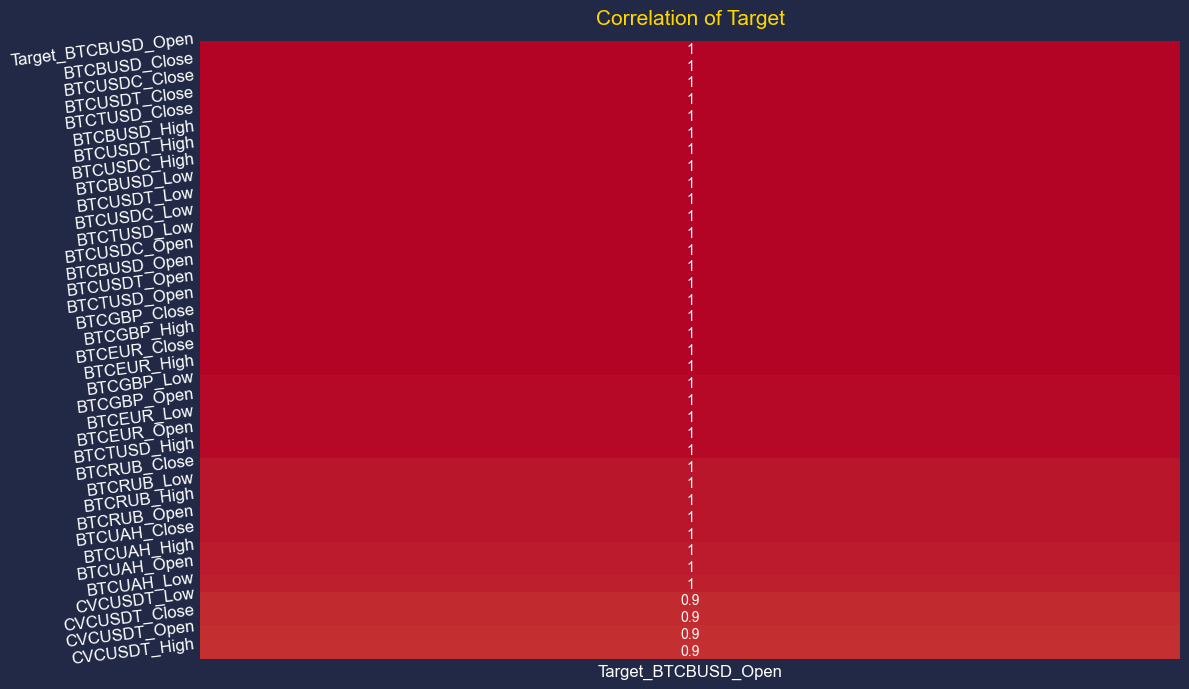

In [11]:
Plots.Plot_Of_Correlation(dataframe=df1)

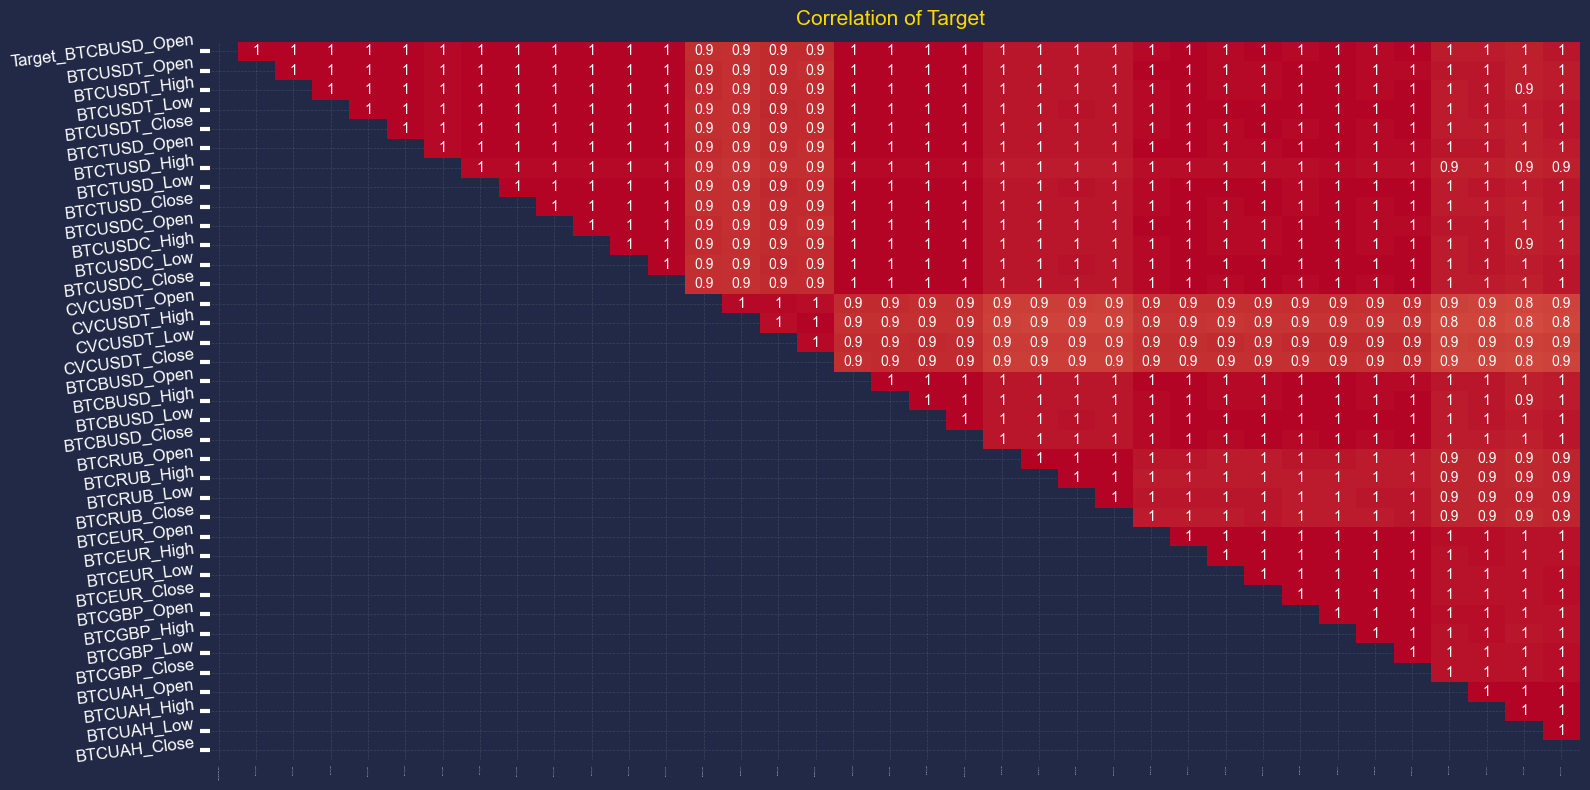

In [12]:
Plots.Plot_Of_Matrix_Correlation(dataframe=df1)

In [ ]:
def log_return(self, name_of_column):
    '''
    This function create a columns and calculate Log Returns
    Parameter is column_log_return = list ... ['BTCBUSD_Open', 'ETHBUSD_Open']
    '''
    for _ in range(len(column_log_return)):
        self.data[column_log_return+'_LG'] = np.log(self.data[column_log_return] / self.data[column_log_return].shift(1))
        
    return 

In [85]:
for _ in df['ETHBTC_Open']:
    print(_)

0.017954
0.018152
0.018257
0.0184
0.018577
0.017528
0.017472
0.01762
0.017904
0.017704
0.018799
0.018864
0.018827
0.019171
0.019307
0.019397
0.019359
0.019371
0.019489
0.019088
0.018732
0.018677
0.019412
0.020189
0.020418
0.020542
0.0212
0.021816
0.022513
0.022626
0.023154
0.025732
0.026231
0.02611
0.0276
0.0278
0.026937
0.026781
0.027628
0.027509
0.026475
0.025487
0.025813
0.02552
0.02603
0.025556
0.025627
0.025221
0.024818
0.025572
0.025424
0.024526
0.022411
0.023084
0.022076
0.021771
0.021893
0.02212
0.021029
0.021016
0.020526
0.020377
0.020548
0.021158
0.020659
0.020706
0.020422
0.020797
0.021068
0.023377
0.022872
0.02352
0.02328
0.022977
0.022856
0.023069
0.023067
0.024267
0.025276
0.024928
0.024956
0.025647
0.024798
0.025664
0.025252
0.02536
0.024536
0.023898
0.023594
0.023279
0.022757
0.021758
0.021232
0.021504
0.021695
0.021536
0.021441
0.020763
0.021387
0.022082
0.021948
0.022076
0.021917
0.022924
0.022937
0.022726
0.022634
0.023
0.024507
0.024338
0.024975
0.025305
0.024842
0.

In [86]:
df['ETHBTC_Open_LG'] = np.log(df['ETHBTC_Open'] / df['ETHBTC_Open'].shift(1))
df

ETHBTC_Open  ETHBTC_High  ETHBTC_Low  ETHBTC_Close  LTCBTC_Open  \
Open time                                                                     
2020-01-01     0.017954     0.018356    0.017920      0.018150     0.005739   
2020-01-02     0.018152     0.018319    0.017965      0.018256     0.005777   
2020-01-03     0.018257     0.018425    0.017800      0.018297     0.005660   
2020-01-06     0.018400     0.018900    0.018337      0.018576     0.005884   
2020-01-07     0.018577     0.018586    0.017515      0.017528     0.005905   
...                 ...          ...         ...           ...          ...   
2023-12-25     0.052660     0.052920    0.052080      0.052110     0.001654   
2023-12-26     0.052120     0.052690    0.052080      0.052480     0.001658   
2023-12-27     0.052470     0.055110    0.052350      0.054770     0.001723   
2023-12-28     0.054770     0.056220    0.054760      0.055070     0.001750   
2023-12-29     0.055080     0.055550    0.054340      0.054650     0.001799   

            LTCBTC_High  LTCBTC_Low  LTCBTC_Close  BNBBTC_Open  BNBBTC_High  \
Open time                                                                     
2020-01-01     0.005812    0.005729      0.005779     0.001907     0.001918   
2020-01-02     0.005806    0.005626      0.005660     0.001905     0.001905   
2020-01-03     0.005754    0.005585      0.005750     0.001867     0.001907   
2020-01-06     0.006000    0.005852      0.005905     0.001909     0.001959   
2020-01-07     0.005905    0.005672      0.005684     0.001927     0.001928   
...                 ...         ...           ...          ...          ...   
2023-12-25     0.001680    0.001648      0.001657     0.006154     0.006169   
2023-12-26     0.001754    0.001655      0.001722     0.006123     0.007111   
2023-12-27     0.001802    0.001711      0.001748     0.007002     0.007472   
2023-12-28     0.001809    0.001732      0.001797     0.007463     0.007893   
2023-12-29     0.001829    0.001739      0.001741     0.007581     0.007660   

            ...  EURUSDT_Close  OGNBTC_Open  OGNBTC_High  OGNBTC_Low  \
Open time   ...                                                        
2020-01-01  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-02  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-03  ...         1.1157     0.000012     0.000200    0.000012   
2020-01-06  ...         1.1179     0.000012     0.000200    0.000012   
2020-01-07  ...         1.1174     0.000012     0.000200    0.000012   
...         ...            ...          ...          ...         ...   
2023-12-25  ...         1.0974     0.000004     0.000004    0.000004   
2023-12-26  ...         1.1023     0.000004     0.000004    0.000003   
2023-12-27  ...         1.1094     0.000004     0.000004    0.000003   
2023-12-28  ...         1.1041     0.000004     0.000004    0.000003   
2023-12-29  ...         1.1003     0.000003     0.000003    0.000003   

            OGNBTC_Close  OGNUSDT_Open  OGNUSDT_High  OGNUSDT_Low  \
Open time                                                           
2020-01-01      0.000028        0.0989        0.4990       0.0989   
2020-01-02      0.000028        0.0989        0.4990       0.0989   
2020-01-03      0.000028        0.0989        0.4990       0.0989   
2020-01-06      0.000028        0.0989        0.4990       0.0989   
2020-01-07      0.000028        0.0989        0.4990       0.0989   
...                  ...           ...           ...          ...   
2023-12-25      0.000004        0.1524        0.1661       0.1515   
2023-12-26      0.000004        0.1628        0.1634       0.1371   
2023-12-27      0.000004        0.1513        0.1624       0.1462   
2023-12-28      0.000003        0.1575        0.1605       0.1450   
2023-12-29      0.000003        0.1462        0.1502       0.1408   

            OGNUSDT_Close  ETHBTC_Open_LG  
Open time                                  
2020-01-01         0.2180        

In [13]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


tuples = list(zip(*arrays))


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)

s


first  second
bar    one      -1.611571
       two       1.830964
baz    one       1.209216
       two       0.140019
foo    one      -0.121875
       two       0.529364
qux    one       0.712760
       two       0.258253
dtype: float64

In [14]:
s = pd.DataFrame(s)
s

0
first second          
bar   one    -1.611571
      two     1.830964
baz   one     1.209216
      two     0.140019
foo   one    -0.121875
      two     0.529364
qux   one     0.712760
      two     0.258253

In [15]:
s = s.T
s

first        bar                 baz                 foo                qux  \
second       one       two       one       two       one       two      one   
0      -1.611571  1.830964  1.209216  0.140019 -0.121875  0.529364  0.71276   

first             
second       two  
0       0.258253

In [18]:
s[['qux']]


first       qux          
second      one       two
0       0.71276  0.258253

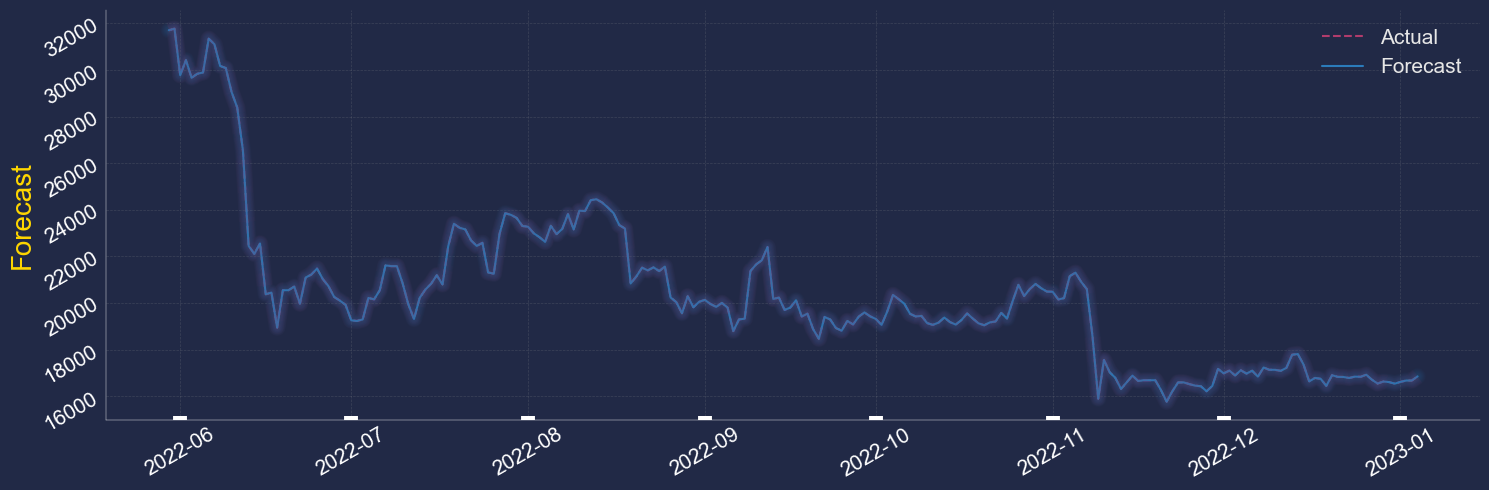

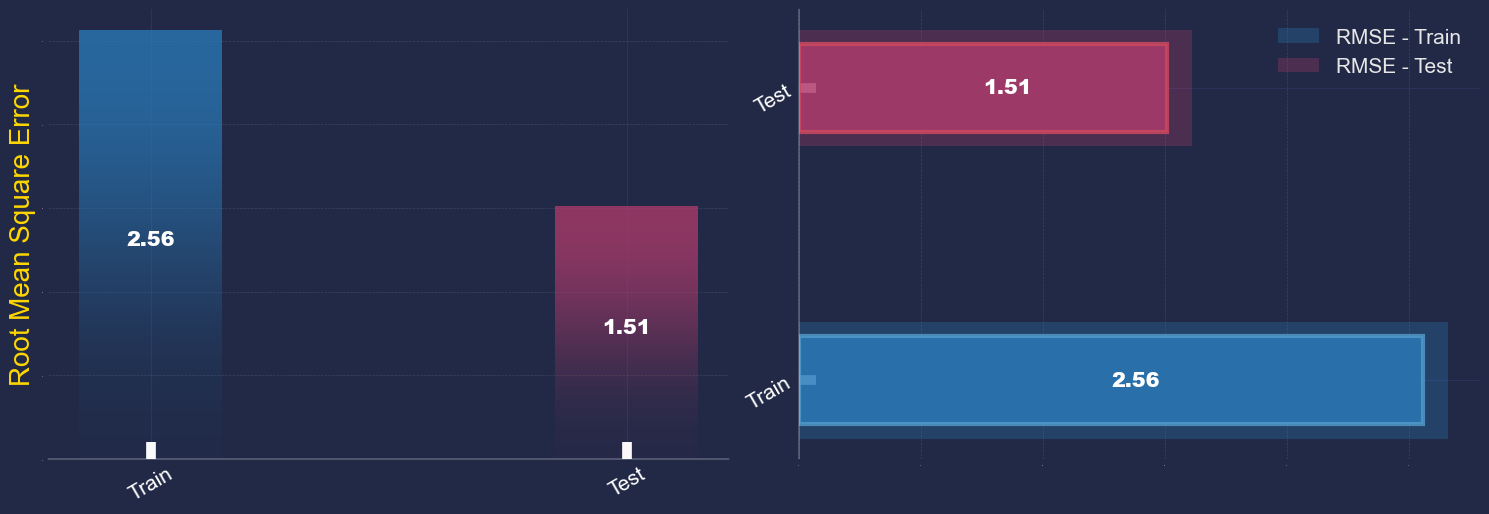

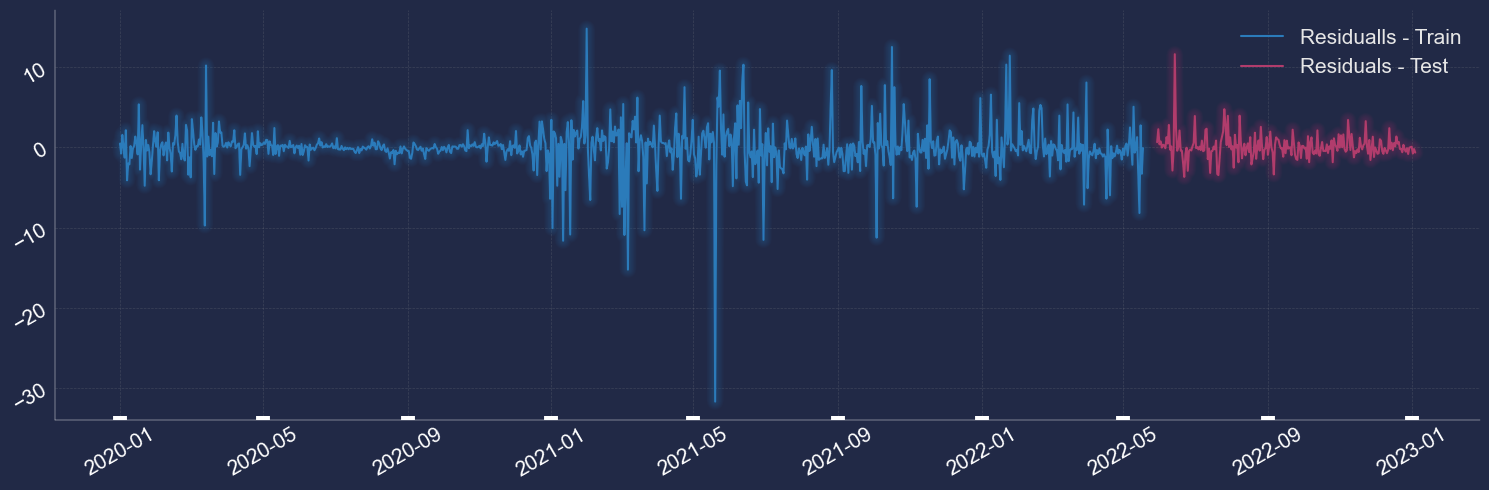

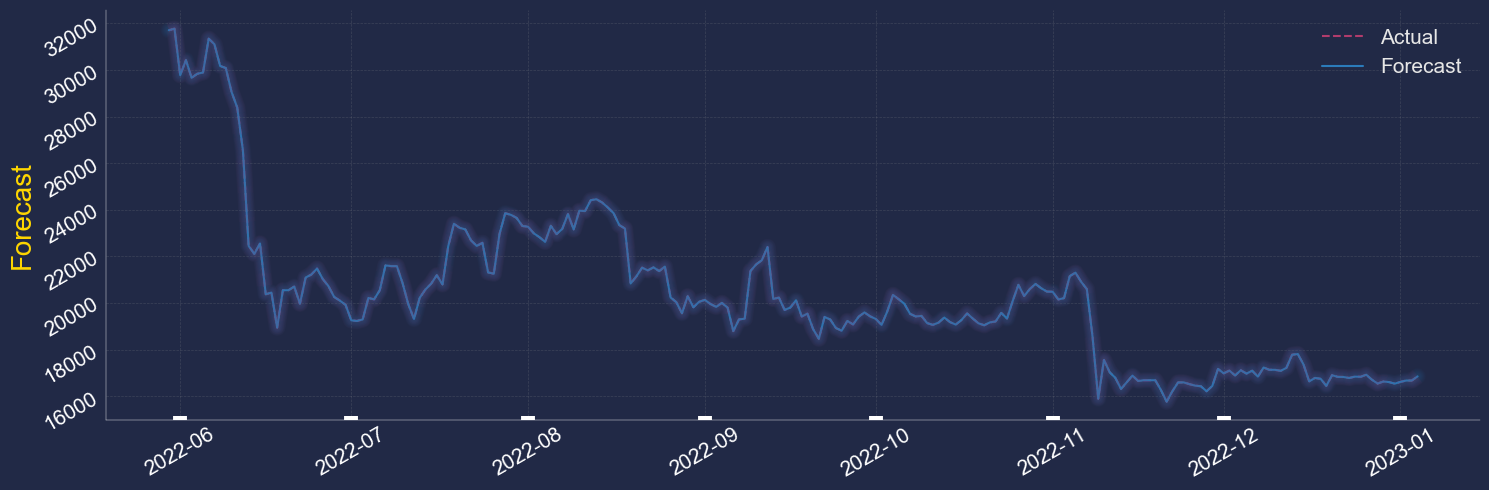

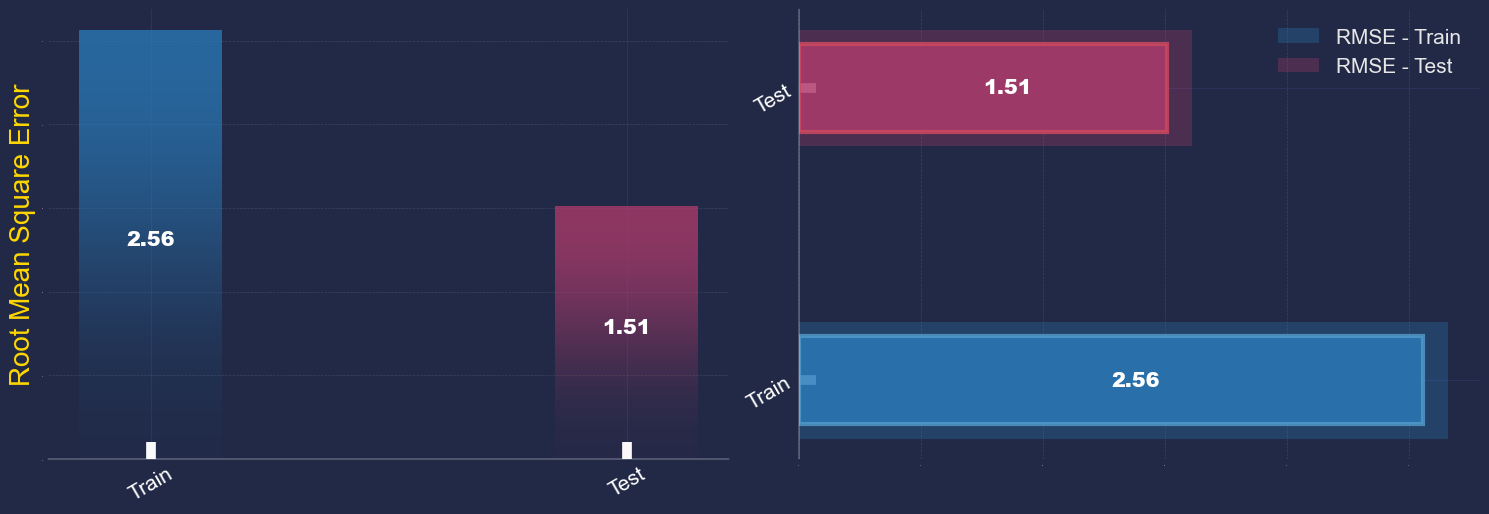

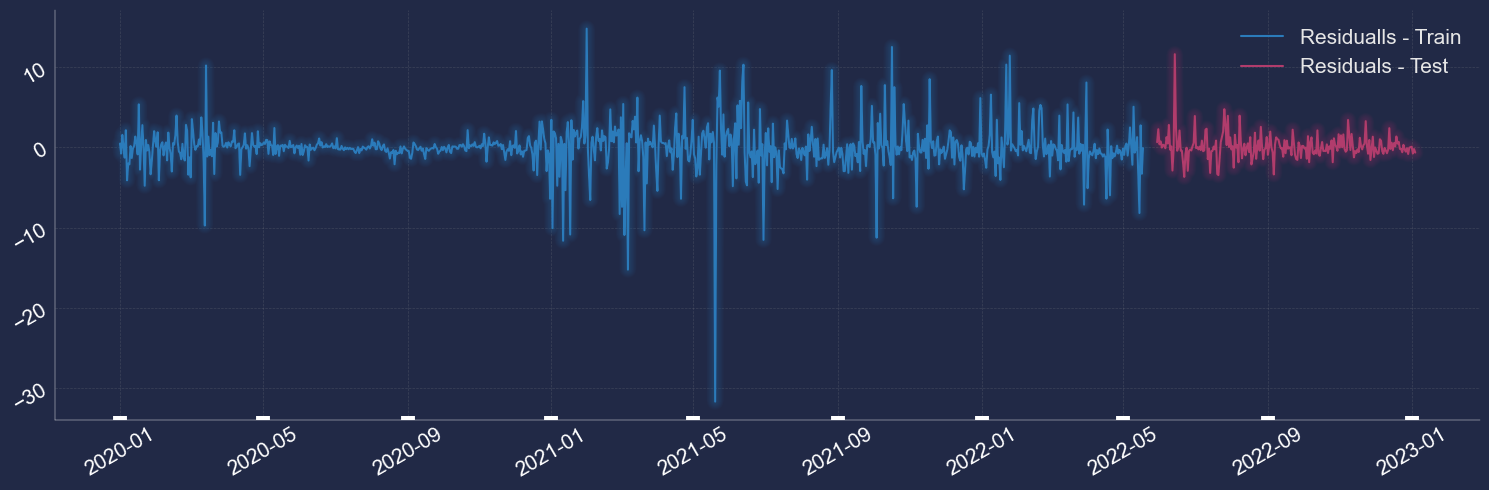

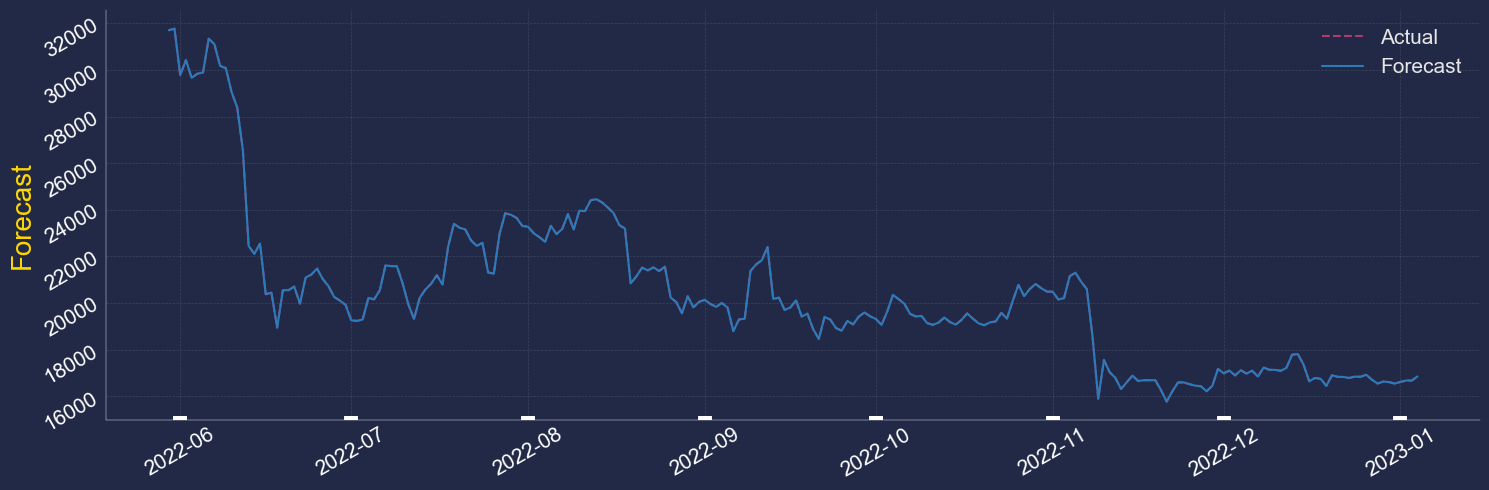

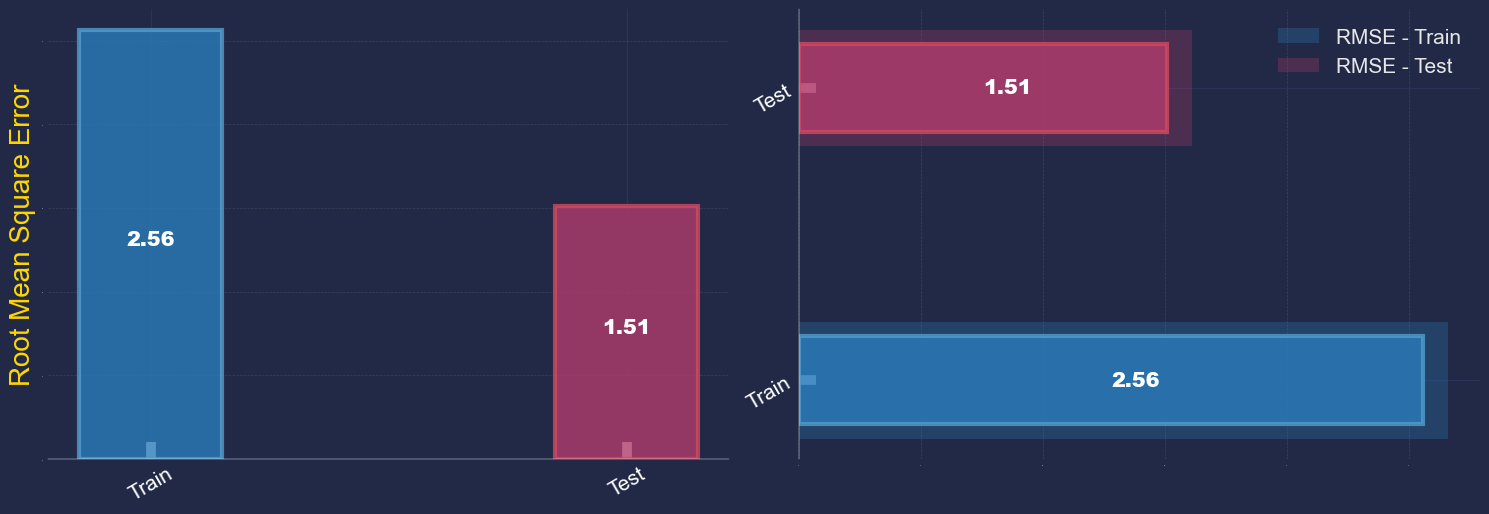

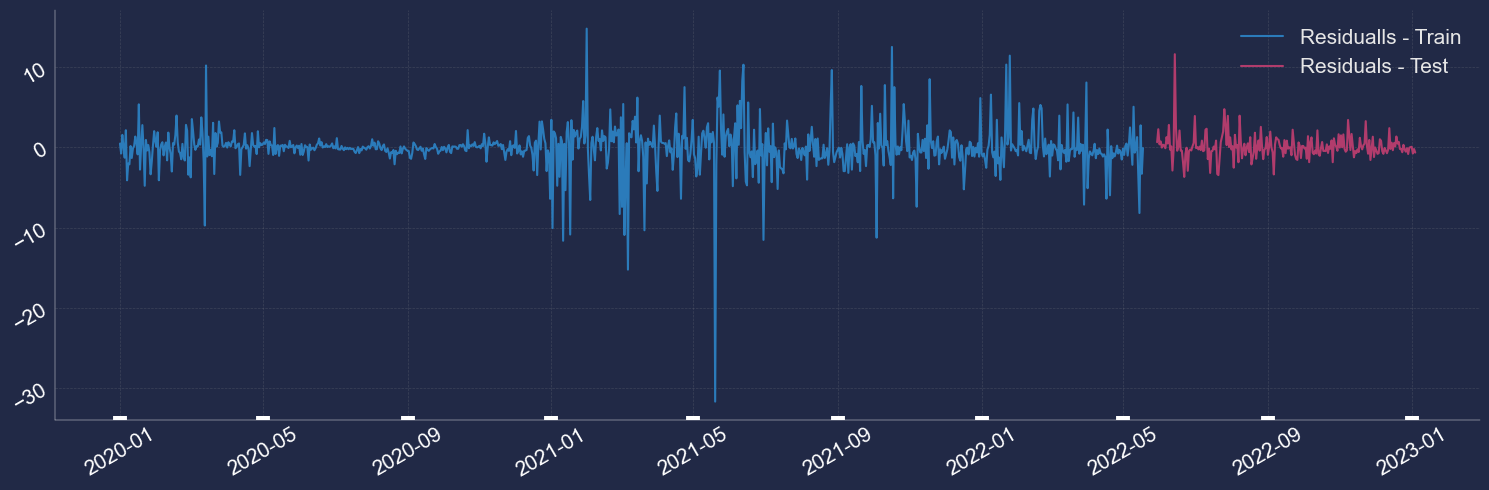

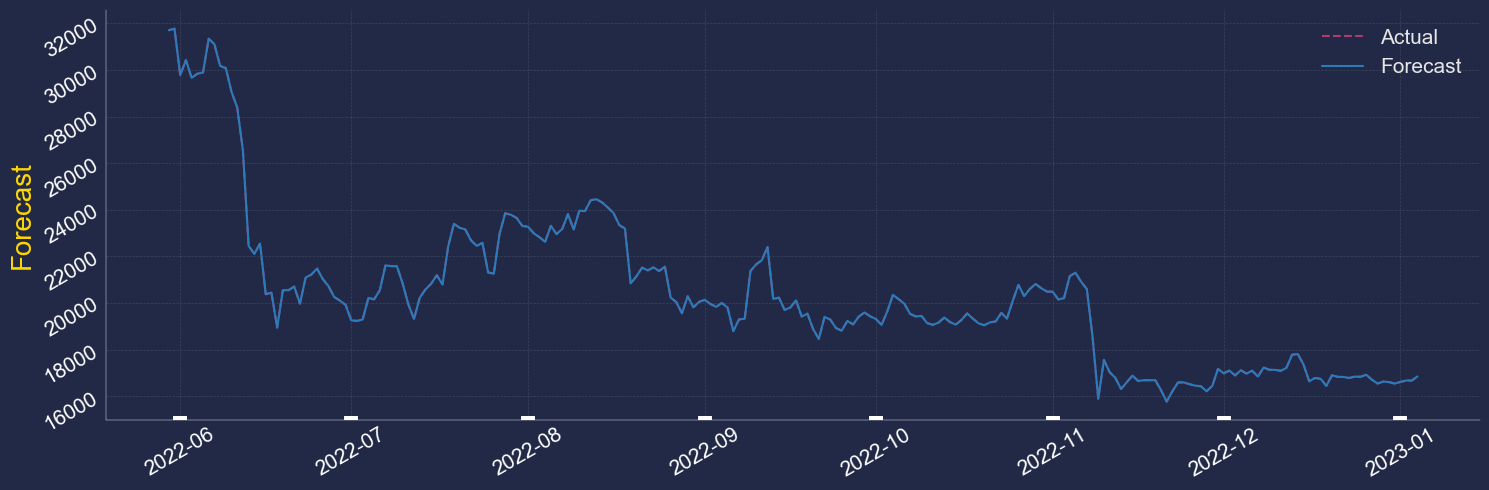

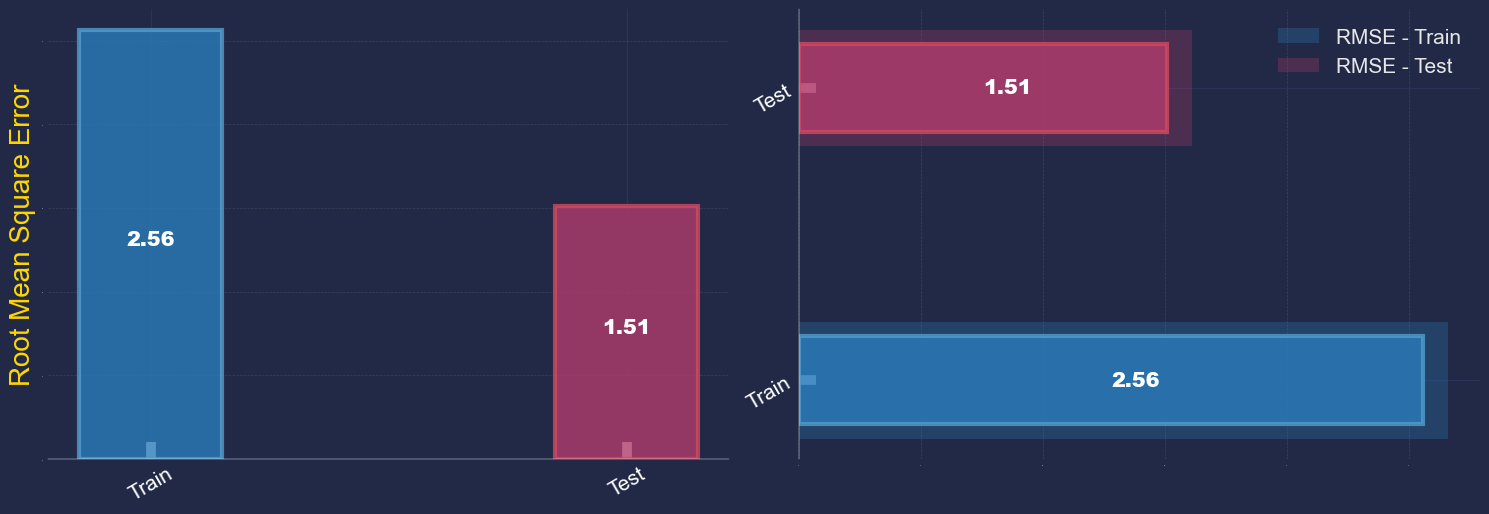

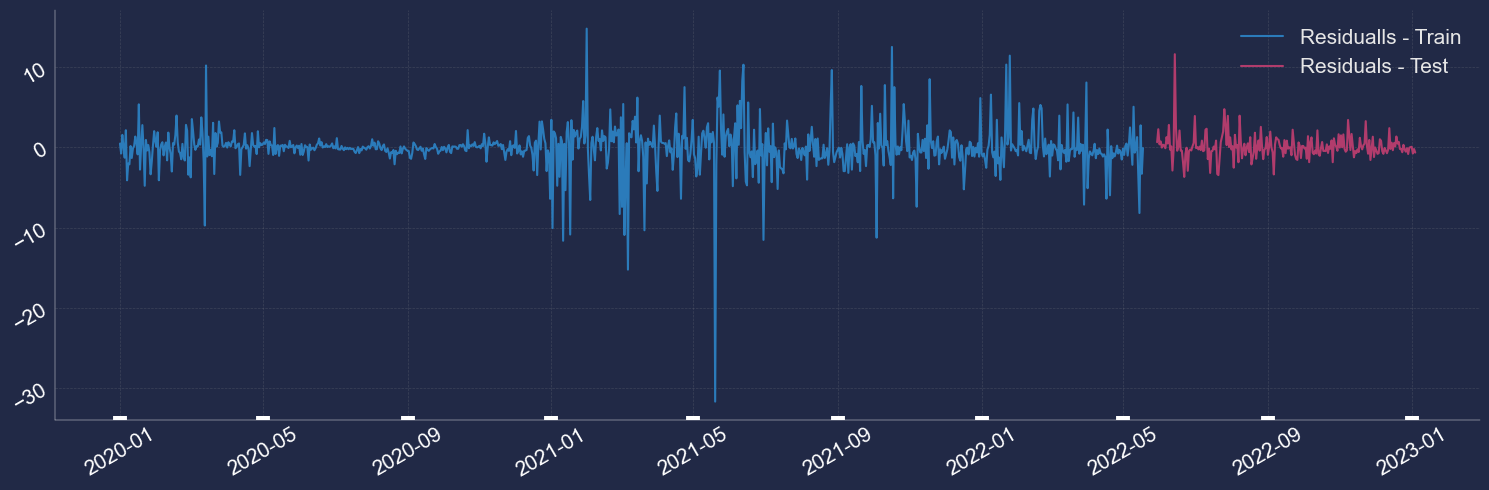

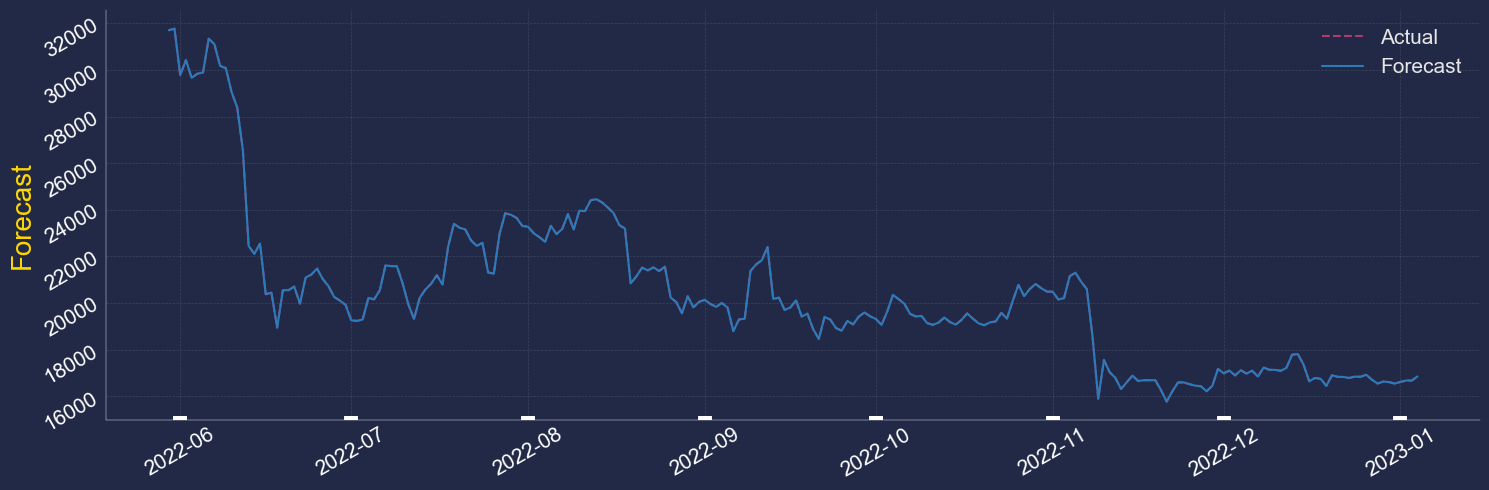

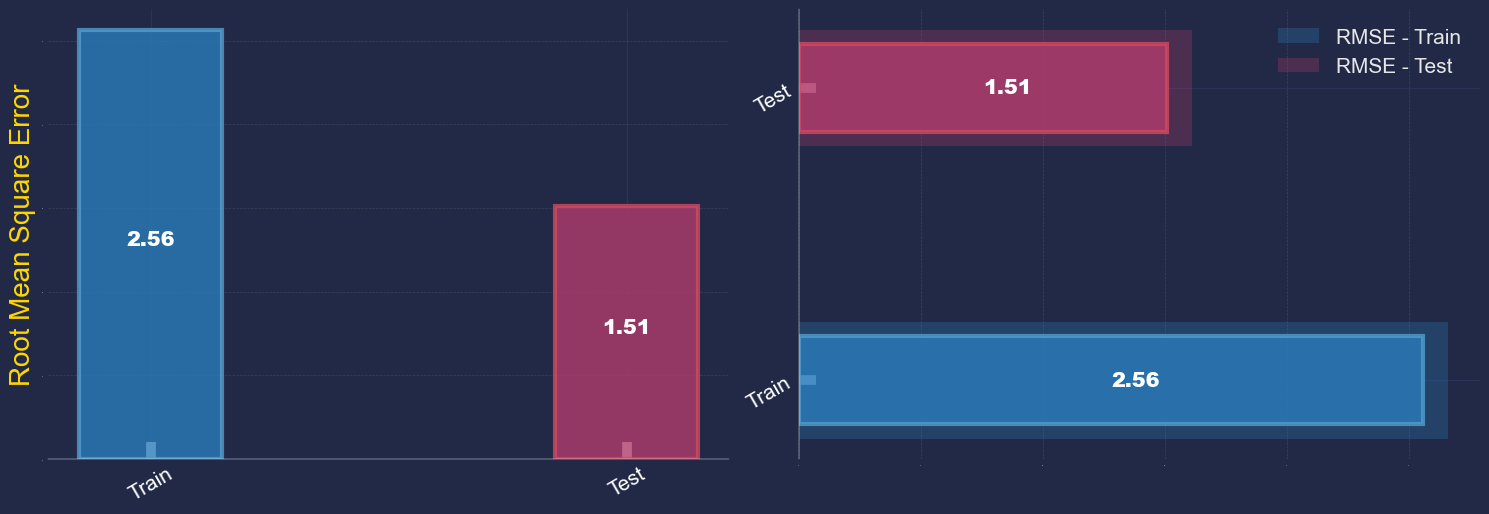

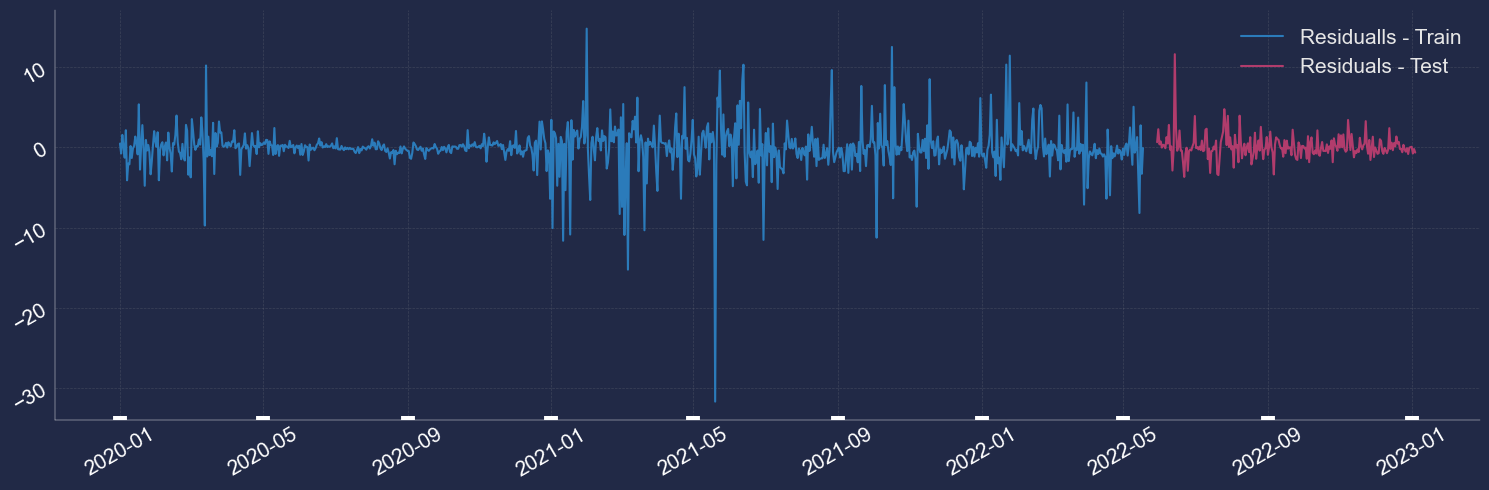

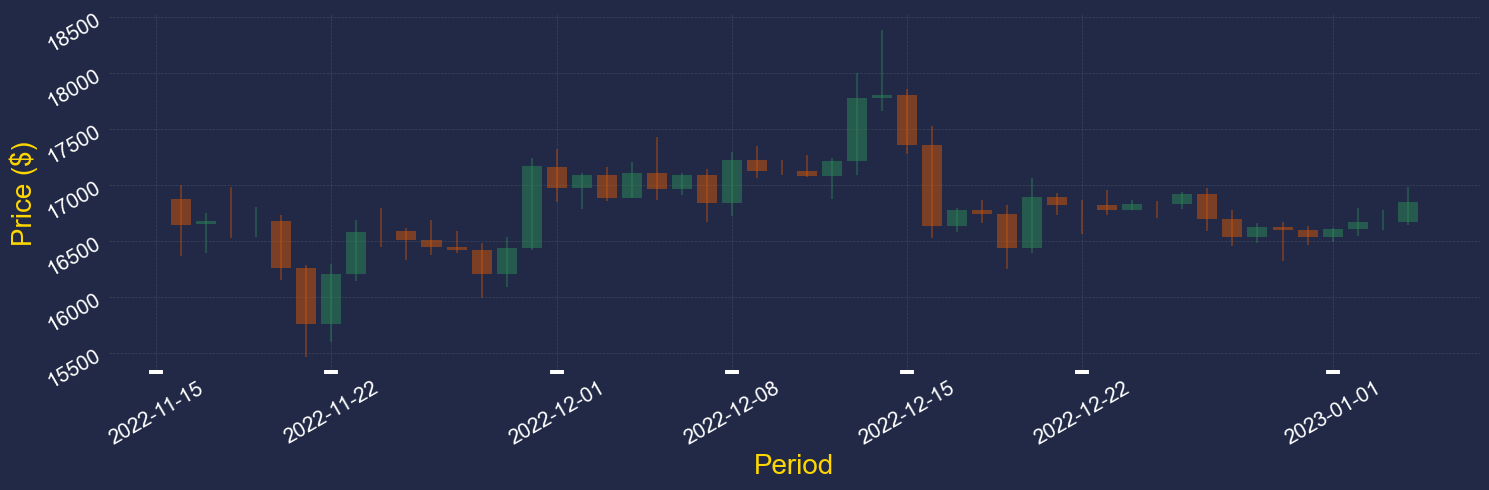

In [20]:
table = df[-50:].copy() 

green_df = table[table.BTCBUSD_Close > table.BTCBUSD_Open].copy()
green_df['Heigth'] = green_df['BTCBUSD_Close'] - green_df['BTCBUSD_Open']

red_df = table[table.BTCBUSD_Close < table.BTCBUSD_Open].copy()
red_df['Heigth'] = red_df['BTCBUSD_Open'] - red_df['BTCBUSD_Close']

pal_green = sns.light_palette("seagreen") #Color
pal_orangered = sns.color_palette("YlOrBr") #Color

plt.style.use("cyberpunk") #Background color

fig = plt.figure(figsize=(15,5), tight_layout=True) #Size of plot dpi=300 for better quality

index = table.index.copy()
index = pd.to_datetime(index)

for i in range(len(table)):
    if table['BTCBUSD_Close'][i] > table['BTCBUSD_Open'][i]:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors=pal_green[5])
    elif table['BTCBUSD_Close'][i] < table['BTCBUSD_Open'][i]:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors=pal_orangered[4])
    else:
        plt.vlines(x=index[i], ymin=table['BTCBUSD_Low'][i], ymax=table['BTCBUSD_High'][i], alpha=0.4, colors='White')
            

plt.bar(x=green_df.index, height=green_df['Heigth'], bottom=green_df['BTCBUSD_Open'], alpha=0.5, color=pal_green[5]) #color=pal_green[5] , linewidth=2 , fill=False
plt.bar(x=red_df.index, height=red_df['Heigth'], bottom=red_df['BTCBUSD_Close'], alpha=0.5, color=pal_orangered[4]) #color=pal_orangered[4] , linewidth=2 , fill=False

plt.tick_params(axis='x', labelrotation=30, labelsize=15, width=10, length=3, direction="in", colors='White') #Rotation label x and y
plt.tick_params(axis='y', labelrotation=30, labelsize=15, colors='White') #Rotation label x and y
plt.grid(zorder=1, alpha=0.2, linestyle='--', linewidth=0.5, color='darkgrey') #Grid of plot
plt.xlabel('Period', fontsize=20, color='Gold') #Left title
plt.ylabel('Price ($)', fontsize=20, color='Gold') #Bottom title
#plt.yticks(range(15500,20000,500), ["{} $".format(v) for v in range(15500,20000,500)])

plt.show()

In [12]:
df

Target_BTCBUSD_Open  BTCBUSD_Open  BTCBUSD_High  BTCBUSD_Low  \
Open time                                                                  
2020-01-01              7177.13       7169.12       7231.86      7151.58   
2020-01-02              6944.41       7177.13       7185.03      6900.00   
2020-01-03              7330.91       6944.41       7393.50      6853.79   
2020-01-04              7346.20       7330.91       7388.00      7263.55   
2020-01-05              7349.84       7346.20       7486.66      7315.00   
...                         ...           ...           ...          ...   
2022-12-31             16534.83      16600.77      16637.66     16462.51   
2023-01-01             16610.69      16534.83      16619.00     16490.74   
2023-01-02             16667.39      16610.69      16793.83     16541.73   
2023-01-03             16669.36      16667.39      16774.13     16597.71   
2023-01-04             16845.42      16669.36      16986.86     16646.27   

            BTCBUSD_Close  BUSDUSDT_Volume  ETHBUSD_Open  ETHBUSD_High  \
Open time                                                                
2020-01-01        7176.58     5.984141e+05        128.54        132.51   
2020-01-02        6945.33     1.795818e+06        129.88        129.88   
2020-01-03        7329.20     3.498114e+06        127.02        134.63   
2020-01-04        7346.20     2.473634e+06        134.20        135.52   
2020-01-05        7351.42     2.647992e+06        134.26        137.99   
...                   ...              ...           ...           ...   
2022-12-31       16534.86     2.546708e+08       1199.43       1207.84   
2023-01-01       16610.68     2.362445e+08       1195.67       1204.00   
2023-01-02       16667.55     3.497910e+08       1199.99       1224.00   
2023-01-03       16669.47     5.884571e+08       1213.61       1219.58   
2023-01-04       16845.70     5.620057e+08       1214.15       1272.35   

            ETHBUSD_Low  ETHBUSD_Close  ...  BCHBUSD_Low  BCHBUSD_Close  \
Open time                               ...                               
2020-01-01       128.43         130.35  ...       202.63         203.65   
2020-01-02       126.01         126.87  ...       192.41         195.44   
2020-01-03       125.70         133.75  ...       192.22         221.76   
2020-01-04       132.38         134.17  ...       219.37         224.18   
2020-01-05       134.26         134.99  ...       221.05         222.62   
...                 ...            ...  ...          ...            ...   
2022-12-31      1191.08        1195.67  ...        96.50          97.10   
2023-01-01      1190.22        1199.99  ...        96.10          96.70   
2023-01-02      1192.73        1213.61  ...        95.40          99.30   
2023-01-03      1204.32        1214.14  ...        98.70          99.70   
2023-01-04      1212.35        1256.34  ...        99.50         101.50   

            XLMBUSD_Open  XLMBUSD_High  XLMBUSD_Low  XLMBUSD_Close  \
Open time                                                            
2020-01-01       0.04471       0.04548      0.04471        0.04522   
2020-01-02       0.04516       0.04516      0.04341        0.04343   
2020-01-03       0.04347       0.04557      0.04317        0.04551   
2020-01-04       0.04529       0.04572      0.04510        0.04550   
2020-01-05       0.04549       0.04605      0.04525        0.04525   
...                  ...           ...          ...            ...   
2022-12-31       0.07240       0.07240      0.07080        0.07110   
2023-01-01       0.07100       0.07270      0.07060        0.07250   
2023-01-02       0.07250       0.07440      0.07090        0.07380   
2023-01-03       0.07370       0.07440      0.07280        0.07350   
2023-01-04       0.07360       0.07460      0.07270        0.07390   

            QTUMBUSD_Open  QTUMBUSD_High  QTUMBUSD_Low  QTUMBUSD_Close  
Open time                                                               
2020-01-01          1.604  

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1)])

model.compile(optimizer='rmsprop', loss='mse')

In [50]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          epochs=300)

Epoch 1/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56651380.0000 - val_loss: 59768184.0000
Epoch 2/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31179722.0000 - val_loss: 78848576.0000
Epoch 3/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37817308.0000 - val_loss: 81255704.0000
Epoch 4/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37360680.0000 - val_loss: 92177632.0000
Epoch 5/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39617316.0000 - val_loss: 90628672.0000
Epoch 6/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37582000.0000 - val_loss: 98988096.0000
Epoch 7/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39110944.0000 - val_loss: 98096576.0000
Epoch 8/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37698088.0000 - val_loss: 104547888.0000
Epoch 9/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38752220.0000 - val_loss: 104978152.0000
Epoch 10/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37736484.0000 - val_loss: 110758632.0000
Epoch 

Epoch 62/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37442536.0000 - val_loss: 266822240.0000
Epoch 63/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37439724.0000 - val_loss: 266737056.0000
Epoch 64/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37430652.0000 - val_loss: 266670736.0000
Epoch 65/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37427220.0000 - val_loss: 266587248.0000
Epoch 66/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37418764.0000 - val_loss: 266519600.0000
Epoch 67/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37414800.0000 - val_loss: 266437680.0000
Epoch 68/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37406808.0000 - val_loss: 266367728.0000
Epoch 69/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37402488.0000 - val_loss: 266287584.0000
Epoch 70/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37394824.0000 - val_loss: 266217552.0000
Epoch 71/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37390156.0000 - val_loss: 26613

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36732104.0000 - val_loss: 257730080.0000
Epoch 183/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36726192.0000 - val_loss: 257654864.0000
Epoch 184/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36720604.0000 - val_loss: 257578304.0000
Epoch 185/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36714624.0000 - val_loss: 257502576.0000
Epoch 186/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36709068.0000 - val_loss: 257426016.0000
Epoch 187/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36703132.0000 - val_loss: 257350496.0000
Epoch 188/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36697536.0000 - val_loss: 257273808.0000
Epoch 189/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36691644.0000 - val_loss: 257197728.0000
Epoch 190/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36686012.0000 - val_loss: 257121168.0000
Epoch 191/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36680220.0000 - val_loss: 257045408

<AxesSubplot:>

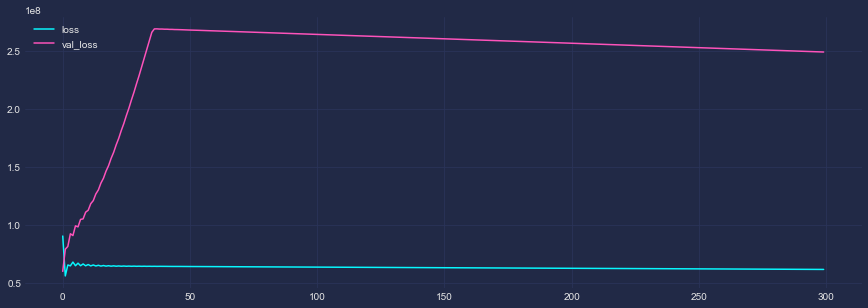

In [51]:
loss_df_mse = pd.DataFrame(model.history.history)

plt.style.use("cyberpunk") #Background color
loss_df_mse.plot(figsize=(15,5))

In [52]:
predict_tr = model.predict(X_train)
dataframe_act_tr = pd.DataFrame(y_train, index=y_train.index)
dataframe_pred_tr = pd.DataFrame(predict_tr, columns=['Predict'], index=y_train.index)

predict = model.predict(X_test)
dataframe_act = pd.DataFrame(y_test, index=y_test.index)
dataframe_pred = pd.DataFrame(predict, columns=['Predict'], index=y_test.index)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


In [53]:
dataframe_act_pred_tr = pd.concat([dataframe_act_tr,dataframe_pred_tr], axis=1)

dataframe_act_pred = pd.concat([dataframe_act,dataframe_pred], axis=1)

<AxesSubplot:xlabel='Open time'>

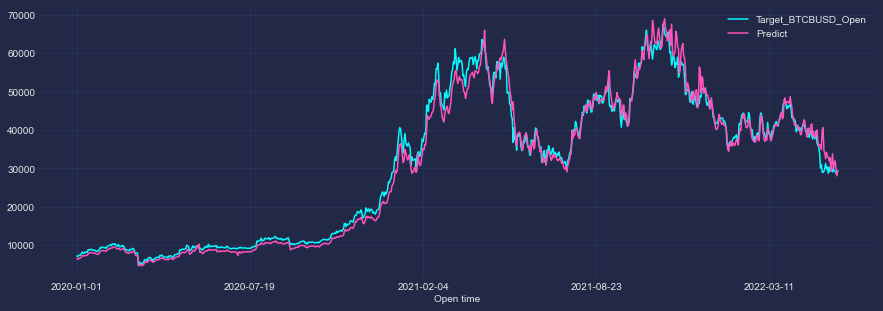

In [54]:
plt.style.use("cyberpunk") #Background color
dataframe_act_pred_tr.plot(figsize=(15,5))

<AxesSubplot:xlabel='Open time'>

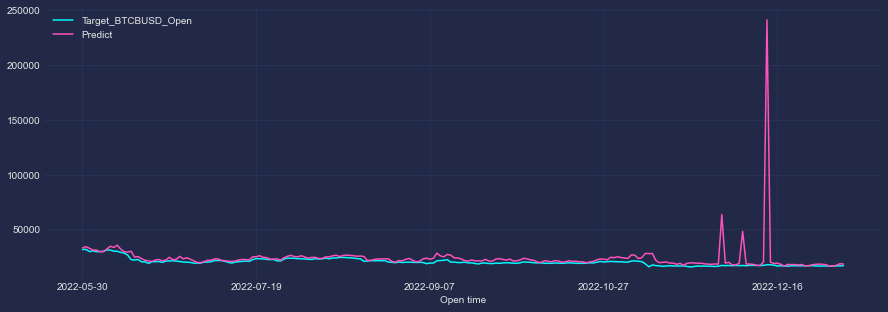

In [55]:
plt.style.use("cyberpunk") #Background color
dataframe_act_pred.plot(figsize=(15,5))

In [ ]:
model.fit()

In [1]:


class Myself:
    """
    A class to represent a person. (Actually just for me)
    """
    def __init__(self):
        self.name = "Angelos - Michail Voudouris"
        self.pronouns = "he/him"
        self.role = "Data Scientist"
        self.bsc_studies = ("B.Sc in Department of Informatics, University of Western Macedonia")
        self.msc_studies = ("MSc in Data Science at International Hellenic University of Thessaloniki")
        self.language_spoken = ["el_GR", "en_US"]
        self.country = "Hellenic"
        self.city = "Thessaloniki"
        self.soft_values = ["Communication | Problem-Solving | Collaboration | Critical Thinking"]

    def hi_all(self):
        print("Hope you find some of my work interesting. I'll be happy to connect with you!")


me = Myself()
me.hi_all()

Hope you find some of my work interesting. I'll be happy to connect with you!
